<div style='text-align: center;'><h1> <span style='font-family:"Times New Roman"'> <span style=''>
    <b>Student's Dropout Prediction </b><br></h1>
</div>
<h3 style='text-align: right;'> <span style='font-family:"Times New Roman"'> <span style=''>
    Nimisha A S <br> 
    ENTRI Elevate <br>
    01/07/2024 <br>
</h3>

# Table of Contents

1. [Overview of Problem Statement](#1)
2. [Objective](#2)
3. [Data Collection](#3)
4. [Data Description](#4)
5. [EDA (Exploratory Data Analysis)](#5)
6. [Data Preprocessing](#6)
   1. [Remove Unnecessary Columns](#6.1)
   2. [Outlier Detection and Treatment](#6.2)
   3. [Skewness](#6.3)
7. [Visualization](#7)
8. [Feature Engineering](#8)
   1. [Feature Extraction](#8.1)
   2. [Feature Transformation](#8.2)
9. [Data Splitting](#9)
10. [Model Selection](#10)
11. [Model Training & Model Evaluation](#11)
12. [Feature Selection](#12)
    1. [SelectKBest](#12.1)
    2. [Lasso (L1 Regularization)](#12.2)
    3. [Recurssive Feature Elimination (RFE)](#12.3)
14. [Hyperparameter Tunning](#13)
15. [Result](#14)
16. [Model Deployment](#15)
17. [Limitations](#16)
18. [Conclusion](#17)
19. [Future work](#18)

# Overview of Problem Statement <a class = "anchor" id = "1"></a>

**Specific goal:** *Predict student dropout with high accuracy.*

**Data description:** *The data could include student demographics, academic performance (grades, attendance), socio-economic factors (family income, parental education), and potentially even extracurricular activities.*

**Success criteria:** *This could be achieving a certain level of accuracy (e.g., 80% or higher) in predicting dropouts, or focusing on other metrics like precision or recall depending on the specific needs.*

# Objective <a class = "anchor" id = "2"></a>

*Develop a machine learning model to predict which students are at risk of dropping out of school/college.*

# Data Collection <a style = "anchor" id = "3"></a>

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv", sep = ";") 
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Description <a style = "anchor" id = "4"></a>

*This dataset combines information from various sources within a higher education institution to analyse factors influencing student success or Dropout. It focuses on undergraduate students in various degree programs, including Agronomy, Design, Education, Nursing, Journalism, Management, Social Service, and Technologies.*

*This dataset offers valuable insights into factors influencing student success by combining demographic, socio-economic, academic path, and performance information. It allows researchers to build classification models to predict student dropout risk or identify students who might benefit from additional support to achieve academic success.*

* Marital Status:
  * 1 – single
  * 2 – married
  * 3 – widower
  * 4 – divorced
  * 5 – facto union
  * 6 – legally separated
* Application mode:
  * 1 - 1st phase - general contingent
  * 2 - Ordinance No. 612/93
  * 5 - 1st phase - special contingent (Azores Island)
  * 7 - Holders of other higher courses
  * 10 - Ordinance No. 854-B/99
  * 15 - International student (bachelor)
  * 16 - 1st phase - special contingent (Madeira Island)
  * 17 - 2nd phase - general contingent
  * 18 - 3rd phase - general contingent
  * 26 - Ordinance No. 533-A/99, item b2) (Different Plan)
  * 27 - Ordinance No. 533-A/99, item b3 (Other Institution)
  * 39 - Over 23 years old
  * 42 - Transfer
  * 43 - Change of course
  * 44 - Technologicalspecialisation diploma holders
  * 51 - Change of institution/course
  * 53 - Short cycle diploma holders
  * 57 - Change of institution/course (International)
* Application order:
  * 0 - first choice
  * 1 - Second choice
  * 2 - Third choice
  * 3 - Fourth choice
  * 4 - Fifth choice
  * 5 - Sixth choice
  * 6 - Seventh choice
  * 7 - Eighth choice
  * 8 - Nineth choice
  * 9 - last choice
* Course:
  * 33 - Biofuel Production Technologies
  * 171 - Animation and Multimedia Design
  * 8014 - Social Service (evening attendance)
  * 9003 - Agronomy
  * 9070 - Communication Design
  * 9085 - Veterinary Nursing
  * 9119 - Informatics Engineering
  * 9130 - Equinculture
  * 9147 - Management
  * 9238 - Social Service
  * 9254 - Tourism
  * 9500 - Nursing
  * 9556 - Oral Hygiene
  * 9670 - Advertising and Marketing Management
  * 9773 - Journalism and Communication
  * 9853 - Basic Education
  * 9991 - Management (evening attendance)
* Daytime/evening attendance:
  * 1 – daytime
  * 0 - evening
* Previous qualification:
  * 1 - Secondary education
  * 2 - Higher education - bachelor's degree
  * 3 - Higher education - degree
  * 4 - Higher education - master's
  * 5 - Higher education - doctorate
  * 6 - Frequency of higher education
  * 9 - 12th year of schooling - not completed
  * 10 - 11th year of schooling - not completed
  * 12 - Other - 11th year of schooling
  * 14 - 10th year of schooling
  * 15 - 10th year of schooling - not completed
  * 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv.
  * 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv.
  * 39 - Technological specialisation course
  * 40 - Higher education - degree (1st cycle)
  * 42 - Professional higher technical course
  * 43 - Higher education - master (2nd cycle)
* Previous qualification (grade): Grade of previous qualification (between 0 and 200)
* Nationality:
  * 1 - Portuguese
  * 2 - German
  * 6 - Spanish
  * 11 - Italian
  * 13 - Dutch
  * 14 - English
  * 17 - Lithuanian
  * 21 - Angolan
  * 22 - Cape Verdean
  * 24 - Guinean
  * 25 - Mozambican
  * 26 - Santomean
  * 32 - Turkish
  * 41 - Brazilian
  * 62 - Romanian
  * 100 - Moldova (Republic of Moldova)
  * 101 - Mexican
  * 103 - Ukrainian
  * 105 - Russian
  * 108 - Cuban
  * 109 - Colombian
* Mother's qualification:
  * 1 - Secondary Education - 12th Year of Schooling or Eq.
  * 2 - Higher Education - Bachelor's Degree
  * 3 - Higher Education - Degree
  * 4 - Higher Education - Master's
  * 5 - Higher Education - Doctorate
  *  6 - Frequency of Higher Education
  *  9 - 12th Year of Schooling - Not Completed
  *  10 - 11th Year of Schooling - Not Completed
  *  11 - 7th Year (Old)
  *  12 - Other - 11th Year of Schoolin
  *  14 - 10th Year of Schooling
  *  18 - General commerce course
  *  19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
  *  22 - Technical-professional course
  *  26 - 7th year of schooling
  *  27 - 2nd cycle of the general high school course
  *  29 - 9th Year of Schooling - Not Completed
  *  30 - 8th year of schooling
  *  34 - Unknown
  *  35 - Can't read or write
  *  36 - Can read without having a 4th year of schooling
  *  37 - Basic education 1st cycle (4th/5th year) or equiv.
  *  38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
  *  39 - Technological specialisation course
  *  40 - Higher education - degree (1st cycle)
  *  41 - Specialized higher studies course
  *  42 - Professional higher technical course
  *  43 - Higher Education - Master (2nd cycle)
  *  44 - Higher Education - Doctorate (3rd cycle)
* Father's qualification:
  * 1 - Secondary Education - 12th Year of Schooling or Eq.
  * 2 - Higher Education - Bachelor's Degree
  * 3 - Higher Education - Degree
  * 4 - Higher Education - Master's
  * 5 - Higher Education - Doctorate
  * 6 - Frequency of Higher Education
  * 9 - 12th Year of Schooling - Not Completed
  * 10 - 11th Year of Schooling - Not Completed
  * 11 - 7th Year (Old)
  * 12 - Other - 11th Year of Schooling
  * 13 - 2nd year complementary high school course
  * 14 - 10th Year of Schooling
  * 18 - General commerce course
  * 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.
  * 20 - Complementary High School Course
  * 22 - Technical-professional course
  * 25 - Complementary High School Course - not concluded
  * 26 - 7th year of schooling
  * 27 - 2nd cycle of the general high school course
  * 29 - 9th Year of Schooling - Not Completed
  * 30 - 8th year of schooling
  * 31 - General Course of Administration and Commerce
  * 33 - Supplementary Accounting and Administration
  * 34 - Unknown
  * 35 - Can't read or write
  * 36 - Can read without having a 4th year of schooling
  * 37 - Basic education 1st cycle (4th/5th year) or equiv.
  * 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.
  * 39 - Technological specialisation course
  * 40 - Higher education - degree (1st cycle)
  * 41 - Specialized higher studies course
  * 42 - Professional higher technical course
  * 43 - Higher Education - Master (2nd cycle)
  * 44 - Higher Education - Doctorate (3rd cycle)
* Mother's occupation:
  * 0 - Student
  * 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
  * 2 - Specialists in Intellectual and Scientific Activities
  * 3 - Intermediate Level Technicians and Professions
  * 4 - Administrative staff
  * 5 - Personal Services, Security and Safety Workers and Sellers
  * 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
  * 7 - Skilled Workers in Industry, Construction and Craftsmen
  * 8 - Installation and Machine Operators and Assembly Workers
  * 9 - Unskilled Workers
  * 10 - Armed Forces Professions
  * 90 - Other Situation
  * 99 - (blank)
  * 122 - Health professionals
  * 123 - teachers
  * 125 - Specialists in information and communication technologies (ICT)
  * 131 - Intermediate-level science and engineering technicians and professions
  * 132 - Technicians and professionals, of intermediate-level of health
  * 134 -Intermediate-level technicians from legal, social, sports, cultural and similar services
  * 141 - Office workers, secretaries in general and data processing operators
  * 143 - Data, accounting, statistical, financial services and registry-related operators
  * 144 - Other administrative support staff
  * 151 - personal service workers
  * 152 - sellers
  * 153 - Personal care workers and the like
  * 171 - Skilled construction workers and the like, except electricians
  * 173 - Skilled workers in printing, precision instrument manufacturing, jewellers, artisans and the like
  * 175 - Workers in food processing, woodworking, clothing and other industries and crafts
  * 191 - cleaning workers
  * 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
  * 193 - Unskilled workers in the extractive industry, construction, manufacturing and transport
  * 194 - Meal preparation assistants
* Father's occupation:
  * 0 - Student
  * 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers
  * 2 - Specialists in Intellectual and Scientific Activities
  * 3 - Intermediate Level Technicians and Professions
  * 4 - Administrative staff
  * 5 - Personal Services, Security and Safety Workers and Sellers
  * 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry
  * 7 - Skilled Workers in Industry, Construction and Craftsmen
  * 8 - Installation and Machine Operators and Assembly Workers
  * 9 - Unskilled Workers
  * 10 - Armed Forces Professions
  * 90 - Other Situation
  * 99 - (blank)
  * 101 - Armed Forces Officers
  * 102 - Armed Forces Sergeants
  * 103 - Other Armed Forces personnel
  * 112 - Directors of administrative and commercial services
  * 114 - Hotel, catering, trade and other services directors
  * 121 - Specialists in the physical sciences, mathematics, engineering and related techniques
  * 122 - Health professionals
  * 123 - teachers
  * 124 - Specialists in finance, accounting, administrative organisation, public and commercial relations
  * 131 - Intermediate-level science and engineering technicians and professions
  * 132 - Technicians and professionals, of intermediate-level of health
  * 134 - Intermediate-level technicians from legal, social, sports, cultural and similar services
  * 135 - Information and communication technology technicians
  * 141 - Office workers, secretaries in general and data processing operators
  * 143 - Data, accounting, statistical, financial services and registry-related operators
  * 144 - Other administrative support staff
  * 151 - personal service workers
  * 152 - sellers
  * 153 - Personal care workers and the like
  * 154 - Protection and security services personnel
  * 161 - Market-oriented farmers and skilled agricultural and animal production workers
  * 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence
  * 171 - Skilled construction workers and the like, except electricians
  * 172 - Skilled workers in metallurgy, metalworking and similar
  * 174 - Skilled workers in electricity and electronics
  * 175 - Workers in food processing, woodworking, clothing and other industries and crafts
  * 181 - Fixed plant and machine operators
  * 182 - assembly workers
  * 183 - Vehicle drivers and mobile equipment operators
  * 192 - Unskilled workers in agriculture, animal production, fisheries and forestry
  * 193 - Unskilled workers in the extractive industry, construction, manufacturing and transport
  * 194 - Meal preparation assistants
  * 195 - Street vendors (except food) and street service providers
* Admission grade: Admission grade (between 0 and 200)
* Displaced:
  * 1 – yes
  * 0 – no
* Educational special needs:
  * 1 – yes
  * 0 – no
* Debtor:
  * 1 – yes
  * 0 – no
* Tuition fees up to date:
  * 1 – yes
  * 0 – no
* Gender:
  * 1 – male
  * 0 – female
* Scholarship holder:
  * 1 – yes
  * 0 – no
* Age at enrollment: Age of student at enrollment
* International:
  * 1 – yes
  * 0 – no
* Curricular units 1st sem (credited): Number of curricular units credited in the 1st semester
* Curricular units 1st sem (enrolled): Number of curricular units enrolled in the 1st semester
* Curricular units 1st sem (evaluations): Number of evaluations to curricular units in the 1st semester
* Curricular units 1st sem (approved): Number of curricular units approved in the 1st semester
* Curricular units 1st sem (grade): Grade average in the 1st semester (between 0 and 20)
* Curricular units 1st sem (without evaluations): Number of curricular units without evaluations in the 1st semester
* Curricular units 2nd sem (credited): Number of curricular units credited in the 2nd semester
* Curricular units 2nd sem (enrolled): Number of curricular units enrolled in the 2nd semester
* Curricular units 2nd sem (evaluations): Number of evaluations to curricular units in the 2nd semester
* Curricular units 2nd sem (approved): Number of curricular units approved in the 2nd semester
* Curricular units 2nd sem (grade): Grade average in the 2nd semester (between 0 and 20)
* Curricular units 2nd sem (without evaluations): Number of curricular units without evaluations in the 1st semester
* Unemployment rate: Unemployment rate (%)
* Inflation rate: Inflation rate (%)
* GDP: GDP
* Target: The problem is formulated as a 3 category classification task (dropout, enrolled, graduate) at the end of the normal duration of the course

# EDA (Exploratory Data Analysis) <a style = "anchor" id = "5"></a>

In [4]:
df.sample(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
1913,2,17,3,8014,0,1,123.0,1,19,37,...,0,6,12,0,0.000000,0,7.6,2.6,0.32,Dropout
455,2,39,1,8014,0,1,130.0,1,34,34,...,1,6,15,2,11.000000,1,7.6,2.6,0.32,Graduate
2144,2,39,1,8014,0,12,110.0,1,37,37,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
3444,1,1,2,9070,1,1,134.0,1,1,19,...,0,6,11,4,11.333333,0,13.9,-0.3,0.79,Dropout
2760,1,39,1,9500,1,4,150.0,1,3,38,...,2,8,10,7,13.306250,0,11.1,0.6,2.02,Dropout
1950,1,1,1,9254,1,1,123.0,1,38,38,...,0,6,0,0,0.000000,0,11.1,0.6,2.02,Dropout
3072,1,44,1,9238,1,39,130.0,1,1,19,...,2,6,9,5,12.000000,0,13.9,-0.3,0.79,Dropout
254,1,17,1,9147,1,1,136.0,1,1,1,...,0,5,6,5,10.800000,0,8.9,1.4,3.51,Graduate
4069,1,17,2,9238,1,1,139.0,1,2,3,...,0,6,9,6,11.666667,0,9.4,-0.8,-3.12,Graduate
770,1,1,1,9085,1,1,134.0,1,1,1,...,0,6,8,6,15.142857,0,11.1,0.6,2.02,Graduate


From the above table, most of the categorical features are numerical and can bring ordinality to the data that is not required. So this should be converted to categorical and get encoded.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [6]:
df.shape

(4424, 37)

In [7]:
df.Target.unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [8]:
df[df.Target == "Dropout"].shape

(1421, 37)

In [9]:
df[df.Target == "Graduate"].shape

(2209, 37)

In [10]:
df[df.Target == "Enrolled"].shape

(794, 37)

As we are not predicting whether the student is enrolled or not. So we are dropping the instances where Target is 'Enrolled'.

Also, the data above is unbalanced as the Dropout instance is 1421 and the Graduate instance is 2209. This can lead to: 
* Biased models that favour the majority class (Graduate)
* Reduce accuracy for the minority class (dropout)
* Overfitting to the majority class

To handle this we are using Undersampling the majority class (Graduate).

In [11]:
df_Enrolled = df[df.Target == "Enrolled"].index 
df.drop(df_Enrolled, inplace = True)

In [12]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=False)# fit predictor and target variable
#x_rus, y_rus = rus.fit_resample(df.drop("Target", axis = 1), df.Target)
df, y = rus.fit_resample(df, df.Target)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
7,1,18,4,9254,1,1,119.0,1,37,37,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
9,1,1,1,9238,1,1,138.0,1,1,19,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout
12,1,1,2,9853,1,1,133.0,1,19,37,...,0,6,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1,1,4,9773,1,1,122.0,1,19,19,...,0,6,6,6,13.333333,0,13.9,-0.3,0.79,Graduate
205,1,1,1,9238,1,1,132.0,1,34,34,...,0,6,9,4,10.750000,0,7.6,2.6,0.32,Graduate
1253,1,1,1,9238,1,1,126.0,1,38,38,...,0,6,7,6,11.333333,0,7.6,2.6,0.32,Graduate
3037,1,1,1,9670,1,1,126.0,1,1,1,...,0,6,9,6,13.000000,0,8.9,1.4,3.51,Graduate


In [14]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [15]:
for i in df.columns: 
    unique = df[i].unique()
    nunique = df[i].nunique()
    print(i, ":\n\tUnique Values: ", unique, "\n\tNumber of unique values: ", nunique, "\n") 

Marital status :
	Unique Values:  [1 2 4 3 5 6] 
	Number of unique values:  6 

Application mode :
	Unique Values:  [17  1 18 39 43 44  7 42 15 53 51  5  2 10 16 26 27 57] 
	Number of unique values:  18 

Application order :
	Unique Values:  [5 4 1 2 3 6] 
	Number of unique values:  6 

Course :
	Unique Values:  [ 171 9070 9254 9238 9853 9773   33 9119 9147 9130 9991 9500 9003 9085
 8014 9556 9670] 
	Number of unique values:  17 

Daytime/evening attendance	 :
	Unique Values:  [1 0] 
	Number of unique values:  2 

Previous qualification :
	Unique Values:  [ 1 10 39  3 40 19  2  4 42 43  9  6 12  5 15 38 14] 
	Number of unique values:  17 

Previous qualification (grade) :
	Unique Values:  [122.  119.  138.  133.  127.  130.  133.1 140.  120.  126.  129.  125.
 141.  118.  106.  114.  160.  115.  123.  113.  111.  137.  148.  117.
 132.  128.  131.  143.  139.  150.  121.  124.  100.  136.  135.  151.
 188.  146.   96.  142.  180.  110.  154.  116.  108.  147.  170.  190.
 158.  149.  1

In [16]:
for i in df.columns: 
    value_count = df[i].value_counts()
    print(value_count, "\n", 50 * "-")

Marital status
1    2469
2     288
4      60
5      19
6       4
3       2
Name: count, dtype: int64 
 --------------------------------------------------
Application mode
1     1028
39     585
17     544
43     205
44     119
7      111
18      90
42      51
51      39
16      19
53      17
15      15
5        7
10       7
2        2
26       1
27       1
57       1
Name: count, dtype: int64 
 --------------------------------------------------
Application order
1    1950
2     350
3     190
4     158
5     104
6      90
Name: count, dtype: int64 
 --------------------------------------------------
Course
9500    460
9238    231
9773    231
9147    223
9085    198
9991    187
9670    178
9254    174
8014    154
9003    140
9070    138
171     131
9853    123
9130    108
9119    100
9556     57
33        9
Name: count, dtype: int64 
 --------------------------------------------------
Daytime/evening attendance\t
1    2501
0     341
Name: count, dtype: int64 
 ----------------------------

In [17]:
df.columns = df.columns.str.replace('\t', '')
df.columns = df.columns.str.replace(' ', '')

In [18]:
df.rename(columns = 
          {"Applicationorder": "Application_form_no.", "Daytime/eveningattendance": "Attendance", "Previousqualification": "PQ", 
           "Previousqualification(grade)": "PQGrade", "Nacionality": "Nationality", 
           "Mother'squalification": "M/Q", "Father'squalification": "F/Q", 
           "Mother'soccupation": "M/O", "Father'soccupation": "F/O", "Tuitionfeesuptodate": "TuitionFeesStatus", 
           "Curricularunits1stsem(credited)": "Sem1_Credit", "Curricularunits1stsem(enrolled)": "Sem1_Enrolled", 
           "Curricularunits1stsem(evaluations)": "Sem1_Evaluations", "Curricularunits1stsem(approved)": "Sem1_Approved", 
           "Curricularunits1stsem(grade)": "Sem1_Grade", "Curricularunits1stsem(withoutevaluations)": "Sem1_Without_Evaluations", 
           "Curricularunits2ndsem(credited)": "Sem2_Credit", "Curricularunits2ndsem(enrolled)": "Sem2_Enrolled", 
           "Curricularunits2ndsem(evaluations)": "Sem2_Evaluations", "Curricularunits2ndsem(approved)": "Sem2_Approved", 
           "Curricularunits2ndsem(grade)": "Sem2_Grade", "Curricularunits2ndsem(withoutevaluations)": "Sem2_Without_Evaluations"}, inplace = True)

In [19]:
df.dtypes

Maritalstatus                 int64
Applicationmode               int64
Application_form_no.          int64
Course                        int64
Attendance                    int64
PQ                            int64
PQGrade                     float64
Nationality                   int64
M/Q                           int64
F/Q                           int64
M/O                           int64
F/O                           int64
Admissiongrade              float64
Displaced                     int64
Educationalspecialneeds       int64
Debtor                        int64
TuitionFeesStatus             int64
Gender                        int64
Scholarshipholder             int64
Ageatenrollment               int64
International                 int64
Sem1_Credit                   int64
Sem1_Enrolled                 int64
Sem1_Evaluations              int64
Sem1_Approved                 int64
Sem1_Grade                  float64
Sem1_Without_Evaluations      int64
Sem2_Credit                 

In [20]:
df["Maritalstatus"] = df["Maritalstatus"].astype(str)
df["Applicationmode"] = df["Applicationmode"].astype(str)
df["Application_form_no."] = df["Application_form_no."].astype(str)
df["Course"] = df["Course"].astype(str)
df["Attendance"] = df["Attendance"].astype(str)
df["PQ"] = df["PQ"].astype(str)
df["Nationality"] = df["Nationality"].astype(str) 
df["M/Q"] = df["M/Q"].astype(str) 
df["F/Q"] = df["F/Q"].astype(str) 
df["M/O"] = df["M/O"].astype(str) 
df["F/O"] = df["F/O"].astype(str) 
df["Displaced"] = df["Displaced"].astype(str)
df["Educationalspecialneeds"] = df["Educationalspecialneeds"].astype(str)
df["Debtor"] = df["Debtor"].astype(str)
df["TuitionFeesStatus"] = df["TuitionFeesStatus"].astype(str)
df["Gender"] = df["Gender"].astype(str) 
df["Scholarshipholder"] = df["Scholarshipholder"].astype(str)
df["International"] = df["International"].astype(str) 

df.sample(7)

,Maritalstatus,Applicationmode,Application_form_no.,Course,Attendance,PQ,PQGrade,Nationality,M/Q,F/Q,...,Sem2_Credit,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Sem2_Without_Evaluations,Unemploymentrate,Inflationrate,GDP,Target
3789,1,17,1,9238,1,1,140.0,1,1,44,...,2,6,6,2,12.500000,0,8.9,1.4,3.51,Dropout
1157,1,16,4,9254,1,1,126.0,1,38,37,...,0,6,6,6,12.500000,0,8.9,1.4,3.51,Graduate
3678,1,17,1,9670,1,1,133.1,1,1,19,...,0,6,6,6,16.000000,0,13.9,-0.3,0.79,Graduate
1205,1,7,1,9147,1,3,130.0,1,38,38,...,0,5,11,4,13.625000,0,10.8,1.4,1.74,Graduate
906,1,1,4,9670,1,1,127.0,1,1,1,...,0,6,6,0,0.000000,0,16.2,0.3,-0.92,Dropout
4211,1,1,1,9238,1,1,150.0,1,19,37,...,0,6,6,6,15.166667,0,9.4,-0.8,-3.12,Graduate
4098,1,17,2,9556,1,1,120.0,1,37,37,...,0,8,8,0,0.000000,0,16.2,0.3,-0.92,Dropout


In [21]:
df[df["M/Q"] == "99"]

,Maritalstatus,Applicationmode,Application_form_no.,Course,Attendance,PQ,PQGrade,Nationality,M/Q,F/Q,...,Sem2_Credit,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Sem2_Without_Evaluations,Unemploymentrate,Inflationrate,GDP,Target


In [22]:
df[df["F/Q"] == "99"]

,Maritalstatus,Applicationmode,Application_form_no.,Course,Attendance,PQ,PQGrade,Nationality,M/Q,F/Q,...,Sem2_Credit,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Sem2_Without_Evaluations,Unemploymentrate,Inflationrate,GDP,Target


From the data description, the value 99 represents blank. After slicing the mother's and father's occupations, it is clear that no blank value is filled with 99.

In [23]:
df.describe()

,PQGrade,Admissiongrade,Ageatenrollment,Sem1_Credit,Sem1_Enrolled,Sem1_Evaluations,Sem1_Approved,Sem1_Grade,Sem1_Without_Evaluations,Sem2_Credit,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Sem2_Without_Evaluations,Unemploymentrate,Inflationrate,GDP
count,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,132.557987,126.986137,23.960591,0.741731,6.261084,8.043631,4.412034,9.982810,0.149191,0.565799,6.217101,7.700563,4.071077,9.320471,0.167136,11.626671,1.252956,-0.046633
std,13.222601,14.786819,8.127841,2.457841,2.547284,4.430010,3.300001,5.374626,0.742140,2.000721,2.244242,4.147924,3.223224,5.798860,0.824564,2.687015,1.393824,2.266303
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,124.000000,117.800000,19.000000,0.000000,5.000000,6.000000,2.000000,10.500000,0.000000,0.000000,5.000000,6.000000,0.000000,0.000000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.300000,20.000000,0.000000,6.000000,8.000000,5.000000,12.166667,0.000000,0.000000,6.000000,8.000000,5.000000,12.000000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,135.000000,27.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,0.000000,7.000000,10.000000,6.000000,13.285714,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2842 entries, 0 to 1521
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Maritalstatus             2842 non-null   object 
 1   Applicationmode           2842 non-null   object 
 2   Application_form_no.      2842 non-null   object 
 3   Course                    2842 non-null   object 
 4   Attendance                2842 non-null   object 
 5   PQ                        2842 non-null   object 
 6   PQGrade                   2842 non-null   float64
 7   Nationality               2842 non-null   object 
 8   M/Q                       2842 non-null   object 
 9   F/Q                       2842 non-null   object 
 10  M/O                       2842 non-null   object 
 11  F/O                       2842 non-null   object 
 12  Admissiongrade            2842 non-null   float64
 13  Displaced                 2842 non-null   object 
 14  Educationalsp

In [25]:
df.isnull().sum()

Maritalstatus               0
Applicationmode             0
Application_form_no.        0
Course                      0
Attendance                  0
PQ                          0
PQGrade                     0
Nationality                 0
M/Q                         0
F/Q                         0
M/O                         0
F/O                         0
Admissiongrade              0
Displaced                   0
Educationalspecialneeds     0
Debtor                      0
TuitionFeesStatus           0
Gender                      0
Scholarshipholder           0
Ageatenrollment             0
International               0
Sem1_Credit                 0
Sem1_Enrolled               0
Sem1_Evaluations            0
Sem1_Approved               0
Sem1_Grade                  0
Sem1_Without_Evaluations    0
Sem2_Credit                 0
Sem2_Enrolled               0
Sem2_Evaluations            0
Sem2_Approved               0
Sem2_Grade                  0
Sem2_Without_Evaluations    0
Unemployme

No need to handle missing values. 

In [26]:
df.duplicated().sum()

0

There is no need to deal with duplicated value.

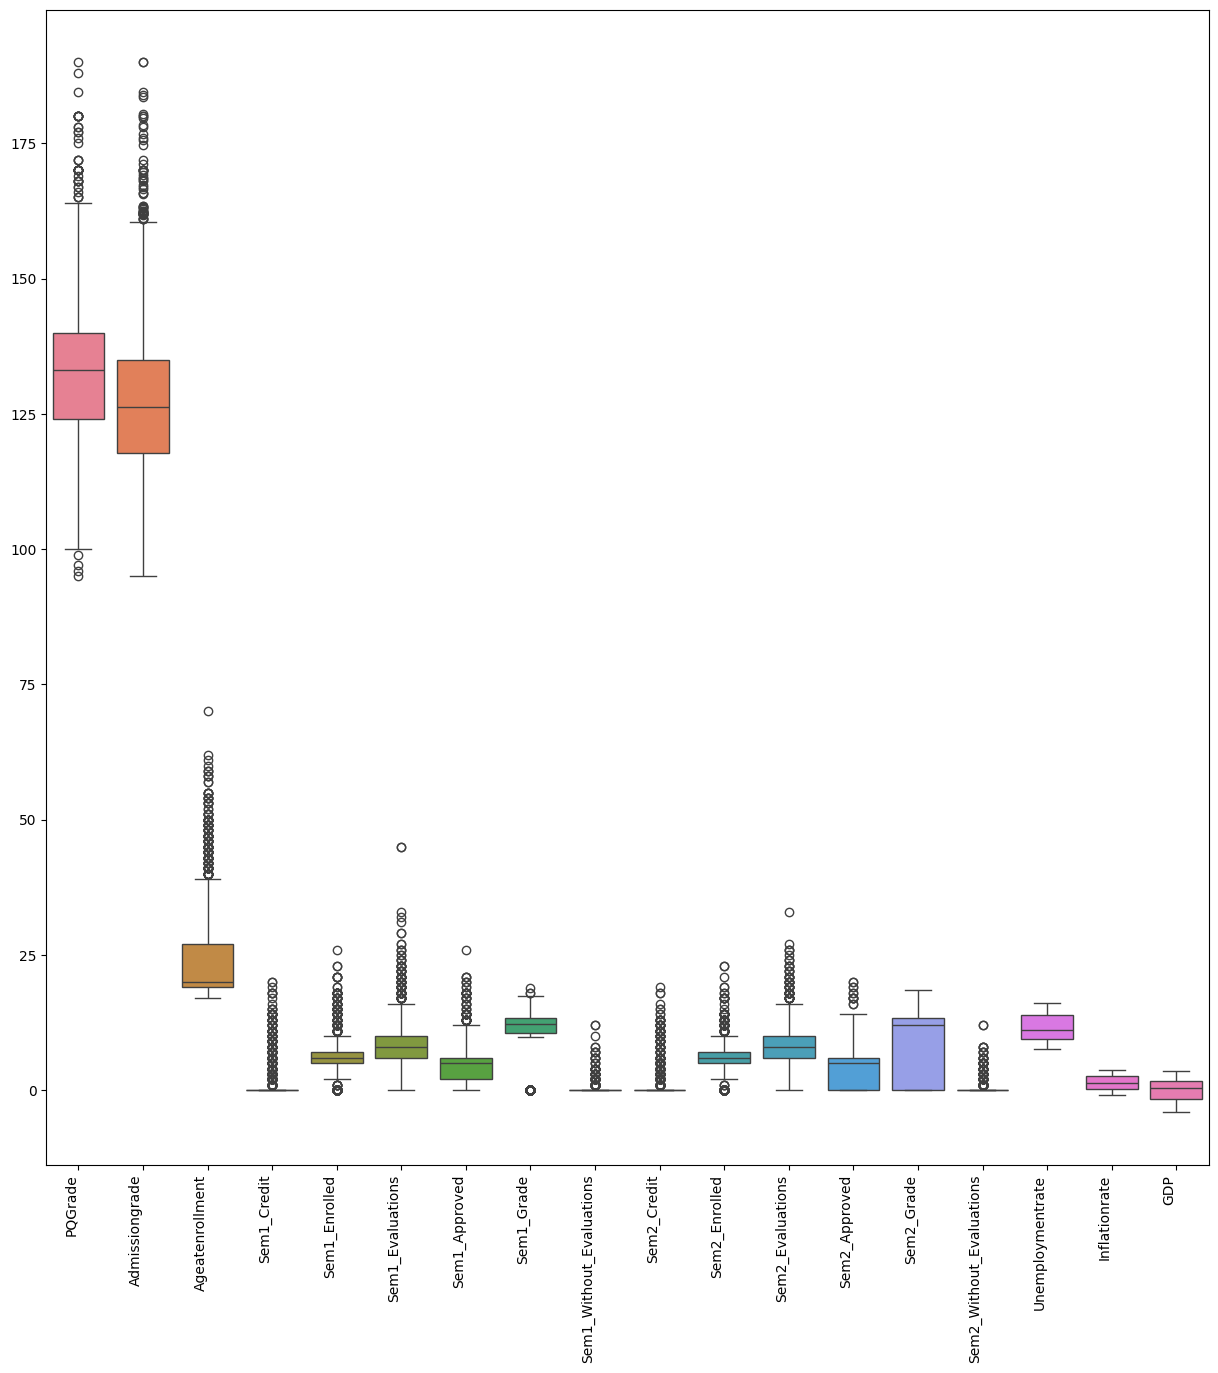

In [27]:
plt.figure(figsize = (15, 15))
sns.boxplot(df.select_dtypes(include = [np.number]))
plt.xticks(rotation = 90, ha = "right")
plt.show()

The above boxplot shows the need for scaling in preprocessing. All boxplots do not lie in the same range. 

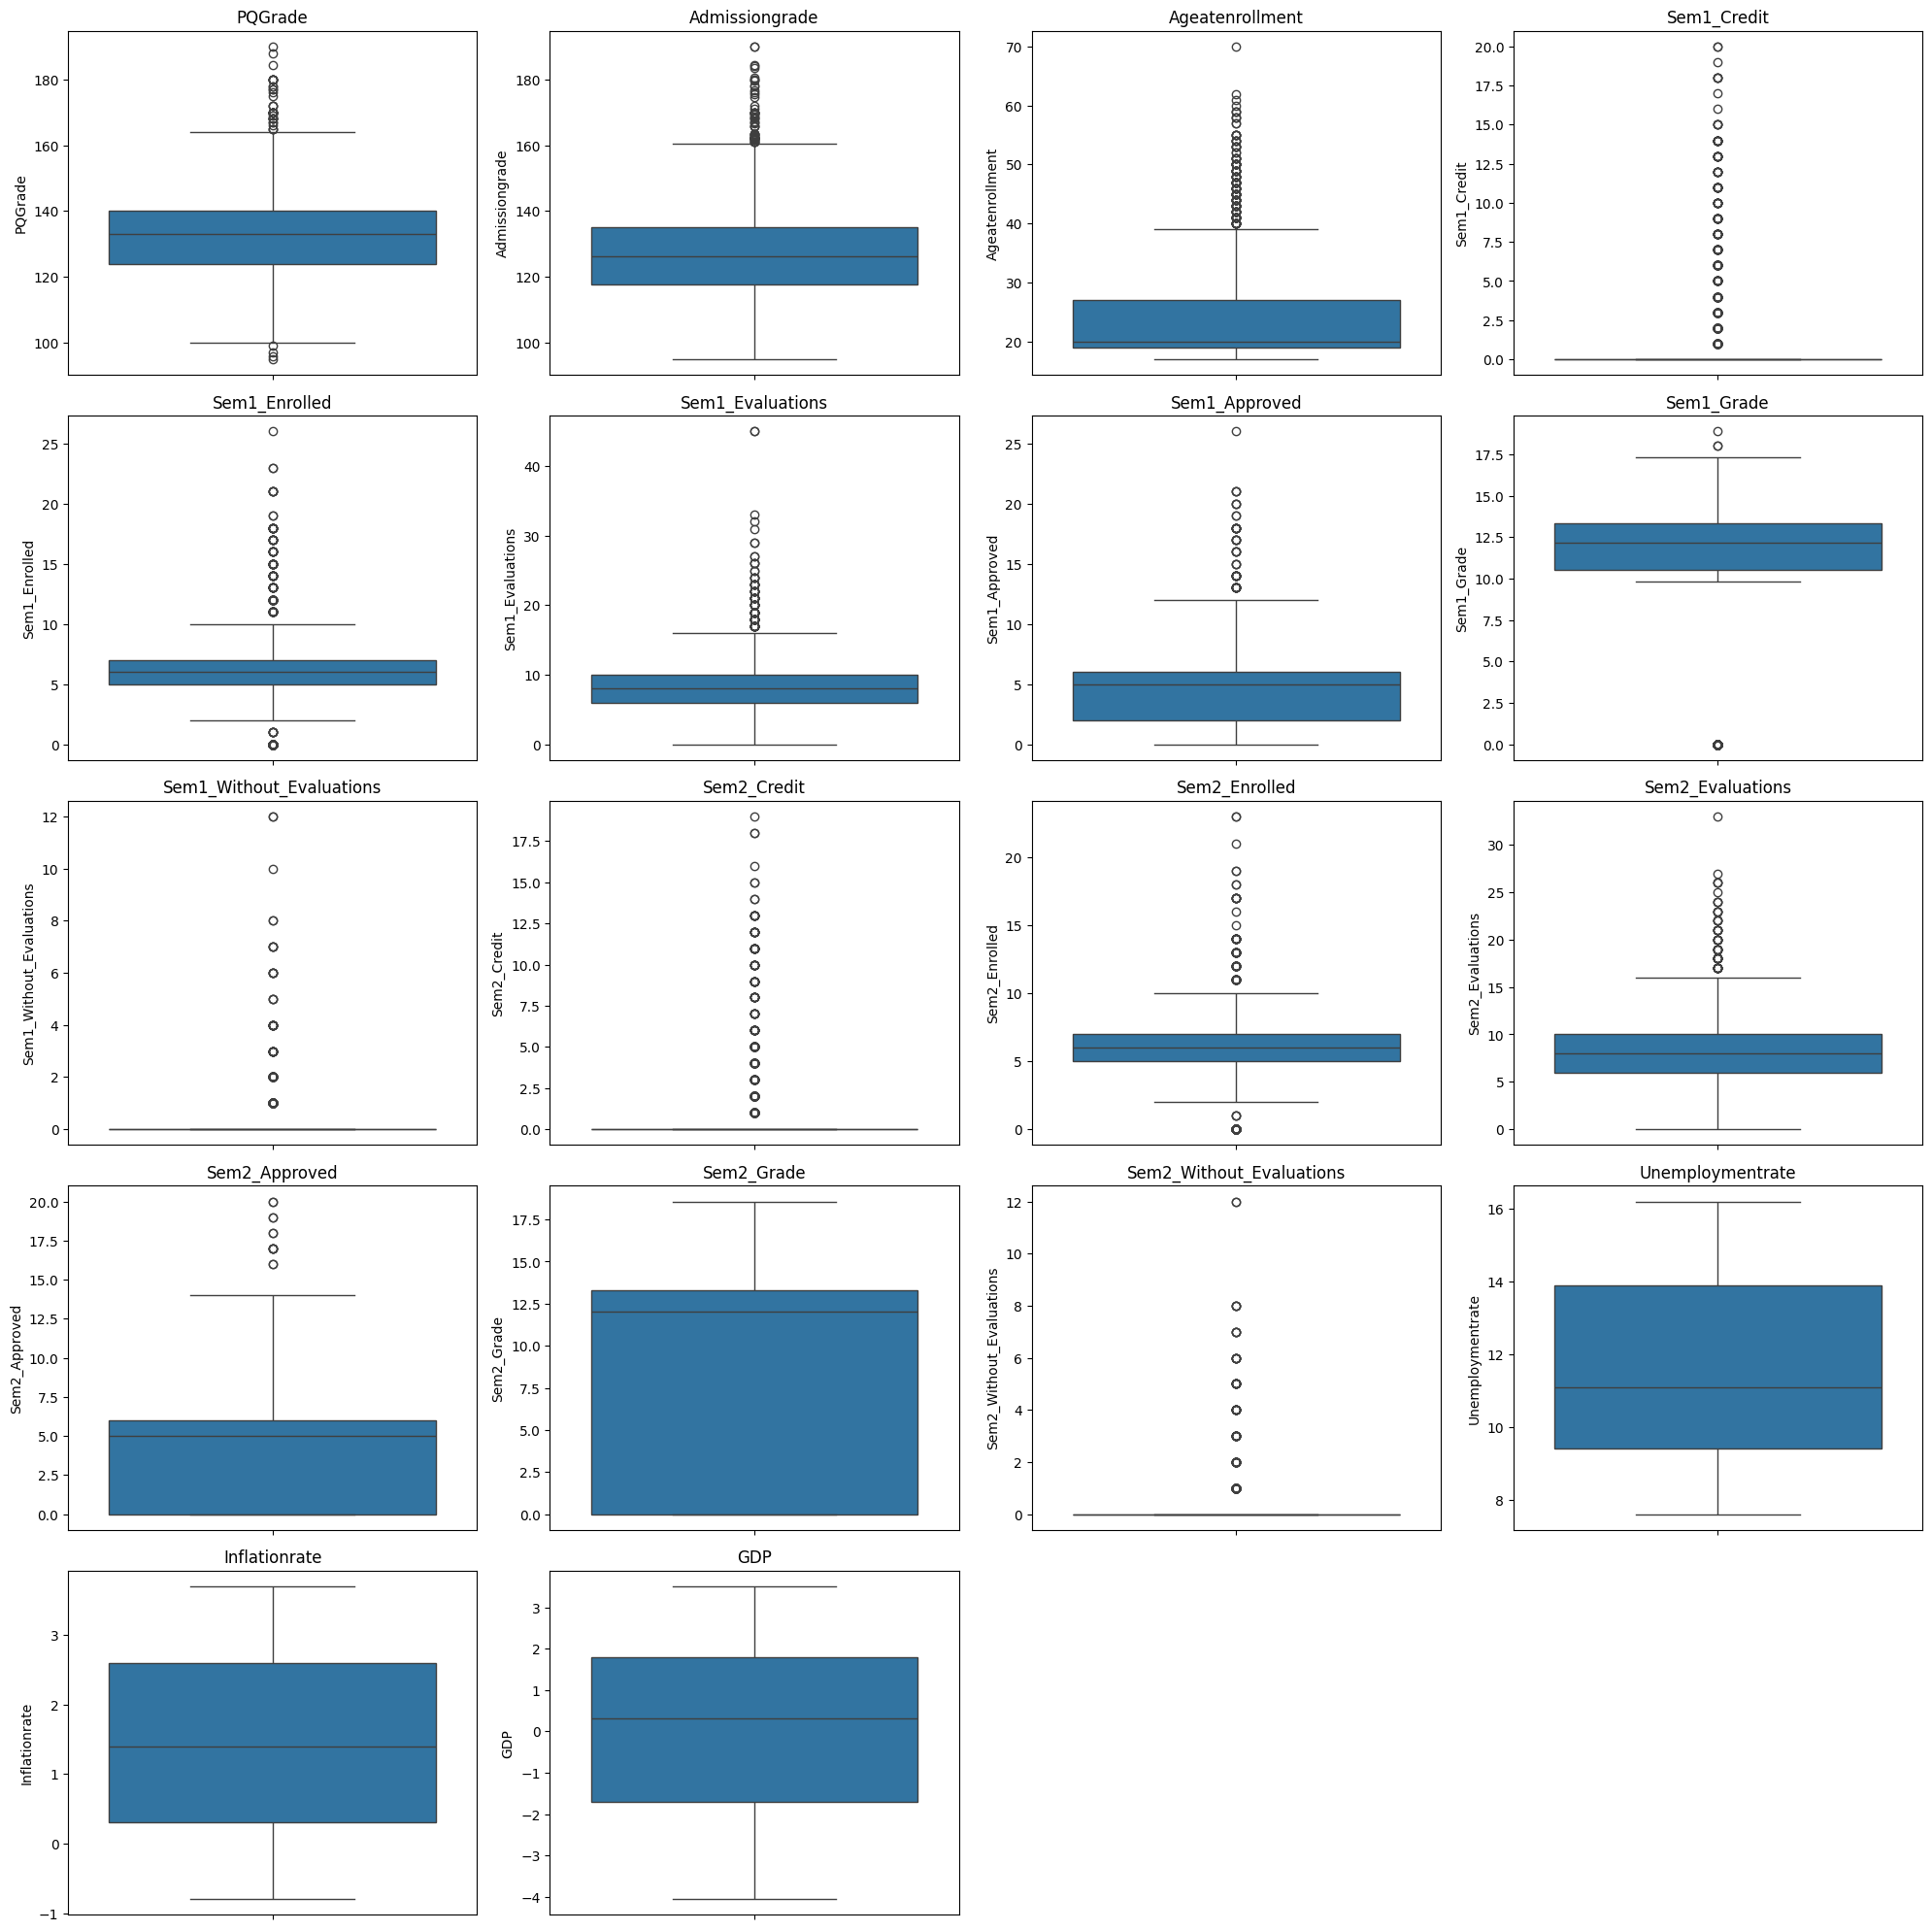

In [28]:
plt.figure(figsize=(20, 20))
num_cols = df.select_dtypes(include = [np.number])

for i, col in enumerate(num_cols):
    plt.subplot(5, 4, i+1) 
    sns.boxplot(df[col]) 
    plt.title(col)  

plt.tight_layout()

plt.show()

The above data shows the importance of removing the outliers. Also, credit and without evaluation from semesters 1 & 2 don't show any significance to the data as approx. 80% of data is one value which is zero. 

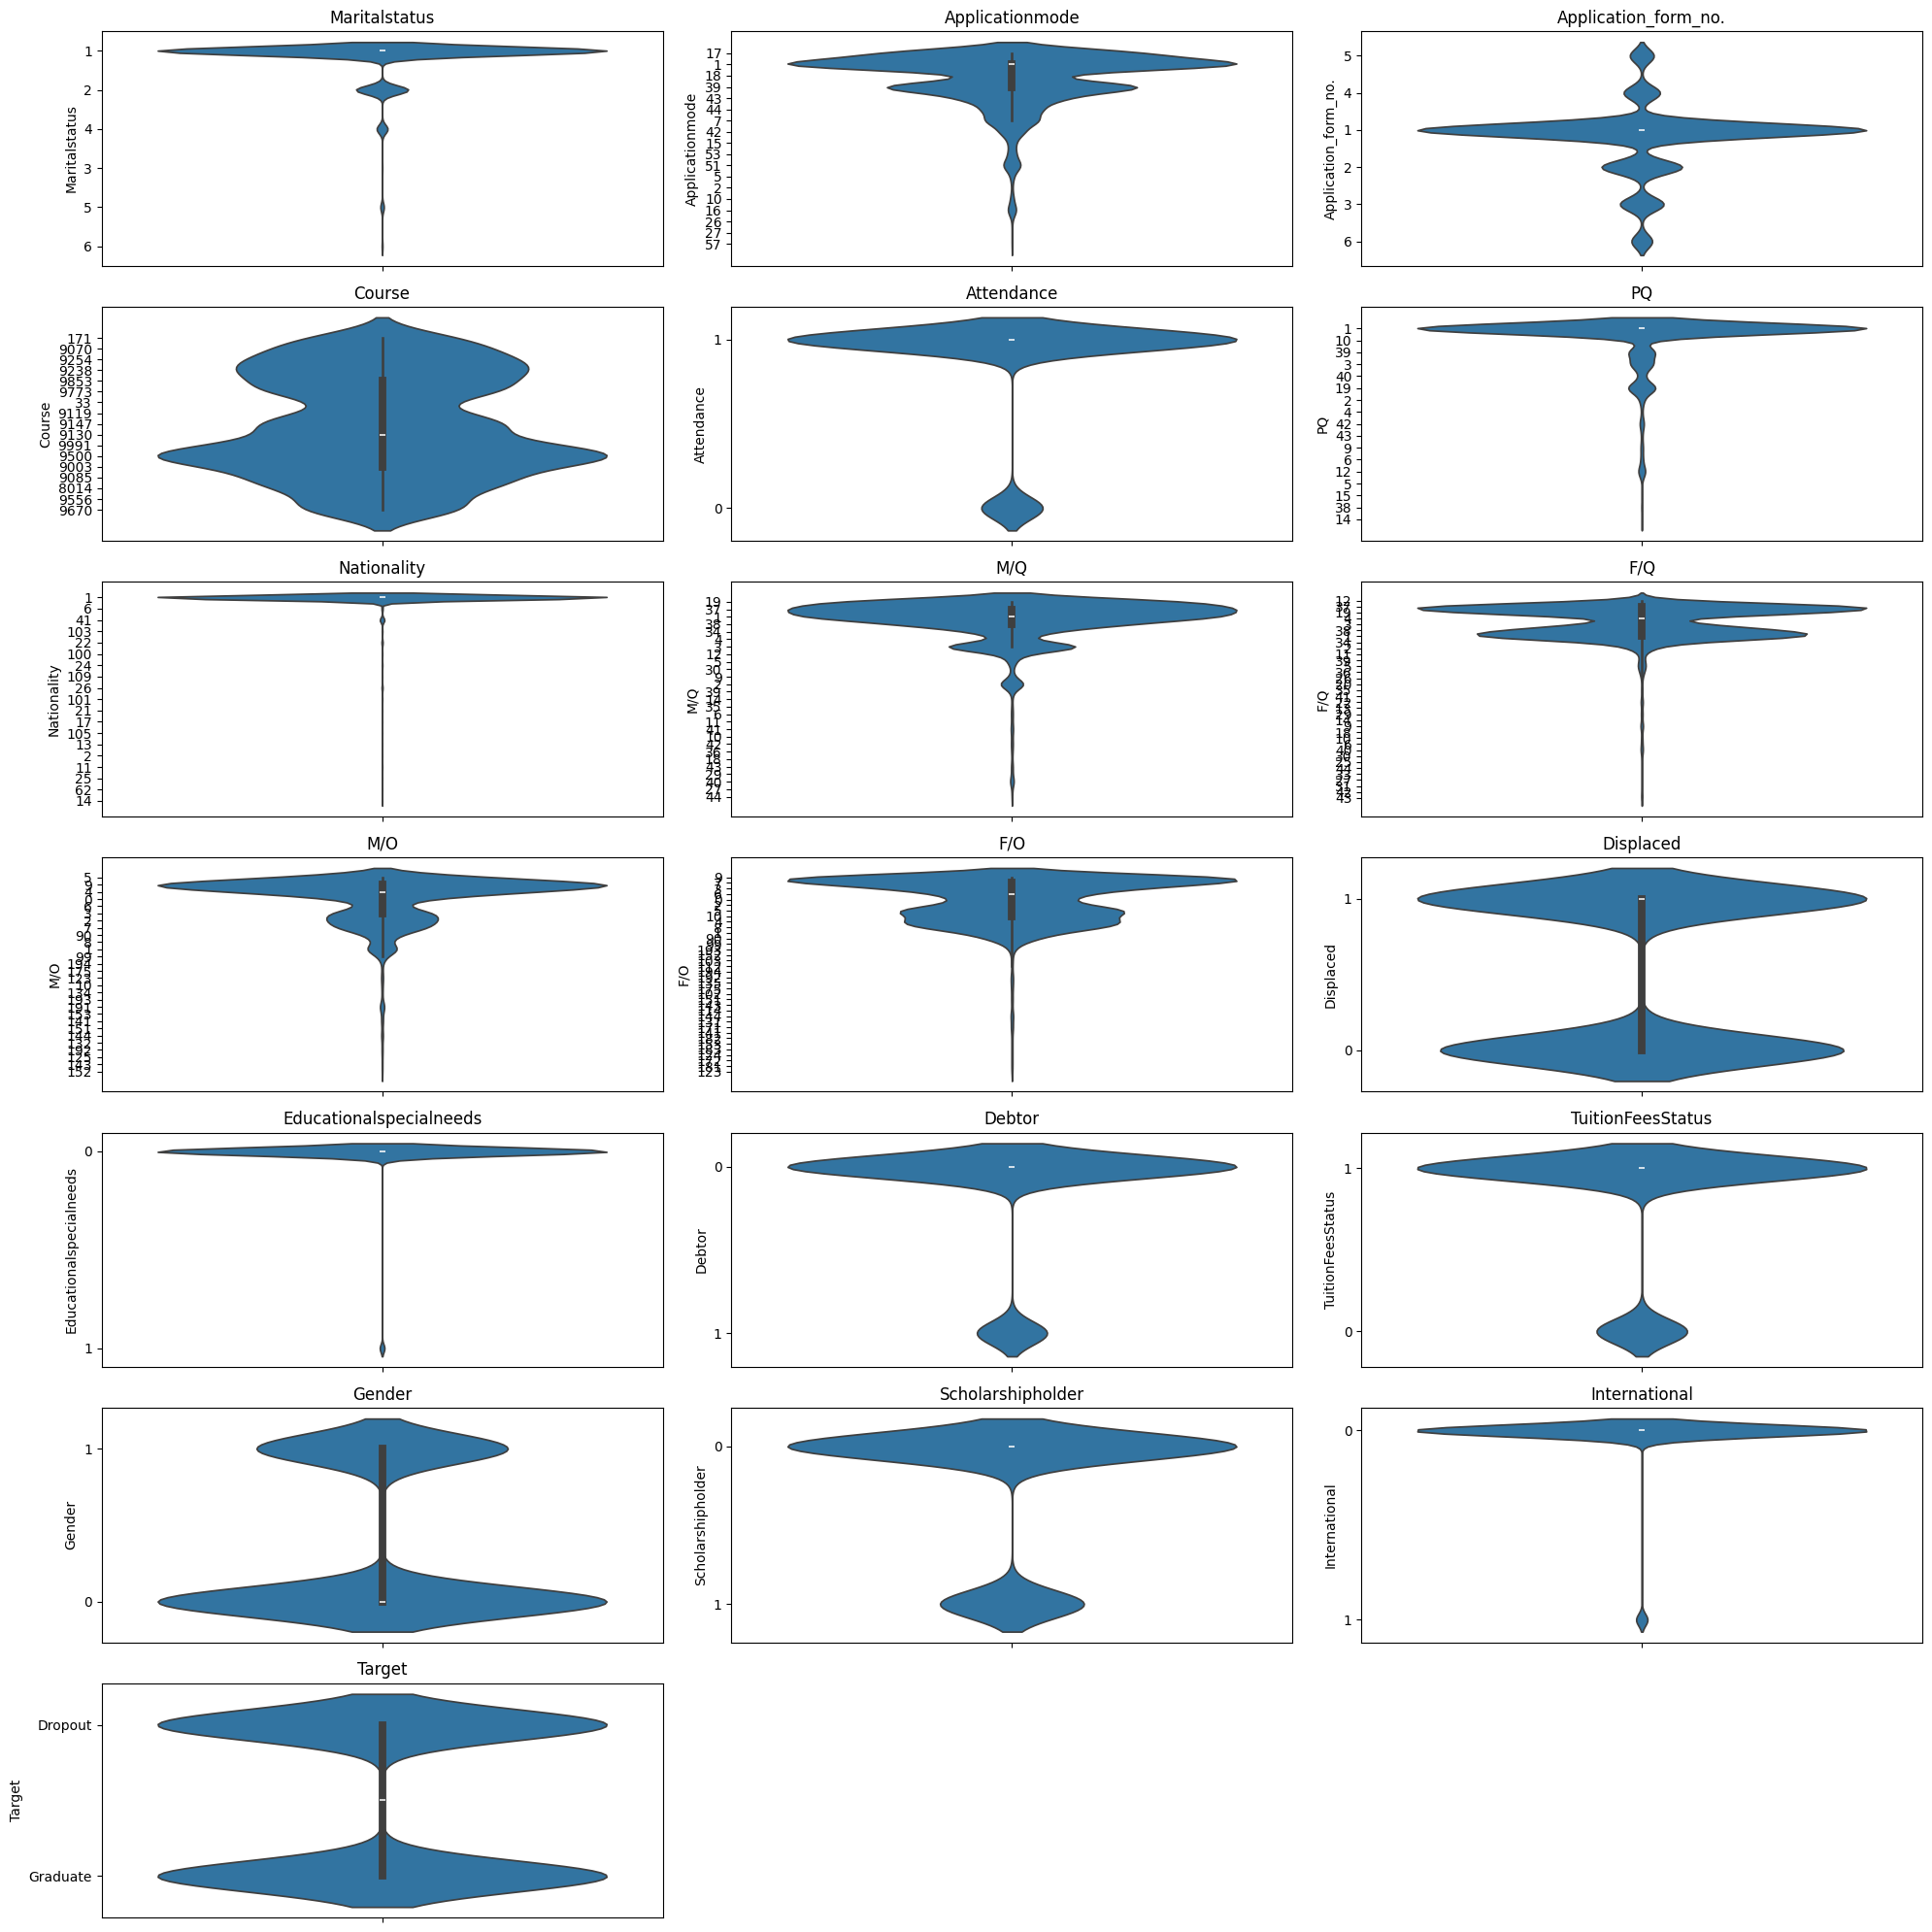

In [29]:
plt.figure(figsize=(20, 20))
num_cols = df.select_dtypes(include = ["object"])

for i, col in enumerate(num_cols):
    plt.subplot(7, 3, i+1) 
    sns.violinplot(df[col]) 
    plt.title(col)  

plt.tight_layout()

plt.show()

While Considering the socioeconomic factor, we either need the mother's highest qualification and occupation or the father's highest qualification and occupation. Also, most students' previous qualifications are the same except some which will not give any valuable information to the data. Similarly, the marital status of the majority number of students is single which also doesn't provide useful information to the data. 

In [30]:
Correlation = pd.DataFrame(df.select_dtypes(include = [np.number])).corr()
Correlation

,PQGrade,Admissiongrade,Ageatenrollment,Sem1_Credit,Sem1_Enrolled,Sem1_Evaluations,Sem1_Approved,Sem1_Grade,Sem1_Without_Evaluations,Sem2_Credit,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Sem2_Without_Evaluations,Unemploymentrate,Inflationrate,GDP
PQGrade,1.000000,0.553472,-0.131474,-0.017716,-0.024579,-0.055822,0.064018,0.077549,-0.005871,-0.029868,-0.027386,-0.048583,0.062367,0.068171,-0.015766,0.043615,0.017497,-0.038837
Admissiongrade,0.553472,1.000000,-0.030891,0.024909,-0.027018,-0.056844,0.099597,0.114913,0.010565,0.027264,-0.030076,-0.046863,0.108544,0.115424,-0.009091,0.034287,-0.030287,0.002004
Ageatenrollment,-0.131474,-0.030891,1.000000,0.182718,0.102674,0.113671,-0.111663,-0.187444,0.062130,0.165250,0.050371,0.037090,-0.170192,-0.197793,0.073724,0.026959,0.027231,-0.067958
Sem1_Credit,-0.017716,0.024909,0.182718,1.000000,0.785497,0.545525,0.631707,0.148998,0.150807,0.950167,0.654546,0.423950,0.494612,0.165987,0.072369,0.003762,0.031386,-0.043685
Sem1_Enrolled,-0.024579,-0.027018,0.102674,0.785497,1.000000,0.672212,0.748539,0.365779,0.160183,0.769823,0.938594,0.588123,0.650317,0.357641,0.085967,0.043898,0.050601,-0.037655
Sem1_Evaluations,-0.055822,-0.056844,0.113671,0.545525,0.672212,1.000000,0.544003,0.445515,0.277667,0.528580,0.604493,0.791258,0.452399,0.368274,0.170489,0.057363,0.000241,-0.102335
Sem1_Approved,0.064018,0.099597,-0.111663,0.631707,0.748539,0.544003,1.000000,0.725765,0.028500,0.611944,0.709717,0.564226,0.913169,0.720448,-0.028163,0.040095,-0.002725,0.007369
Sem1_Grade,0.077549,0.114913,-0.187444,0.148998,0.365779,0.445515,0.725765,1.000000,-0.059490,0.137903,0.388228,0.519838,0.690880,0.830053,-0.047370,0.011573,-0.029147,0.052150
Sem1_Without_Evaluations,-0.005871,0.010565,0.062130,0.150807,0.160183,0.277667,0.028500,-0.059490,1.000000,0.160039,0.141584,0.179058,0.019845,-0.059190,0.609789,-0.040529,-0.042621,-0.132475
Sem2_Credit,-0.029868,0.027264,0.165250,0.950167,0.769823,0.528580,0.611944,0.137903,0.160039,1.000000,0.690705,0.434767,0.523483,0.162226,0.092865,0.002764,0.023723,-0.043924


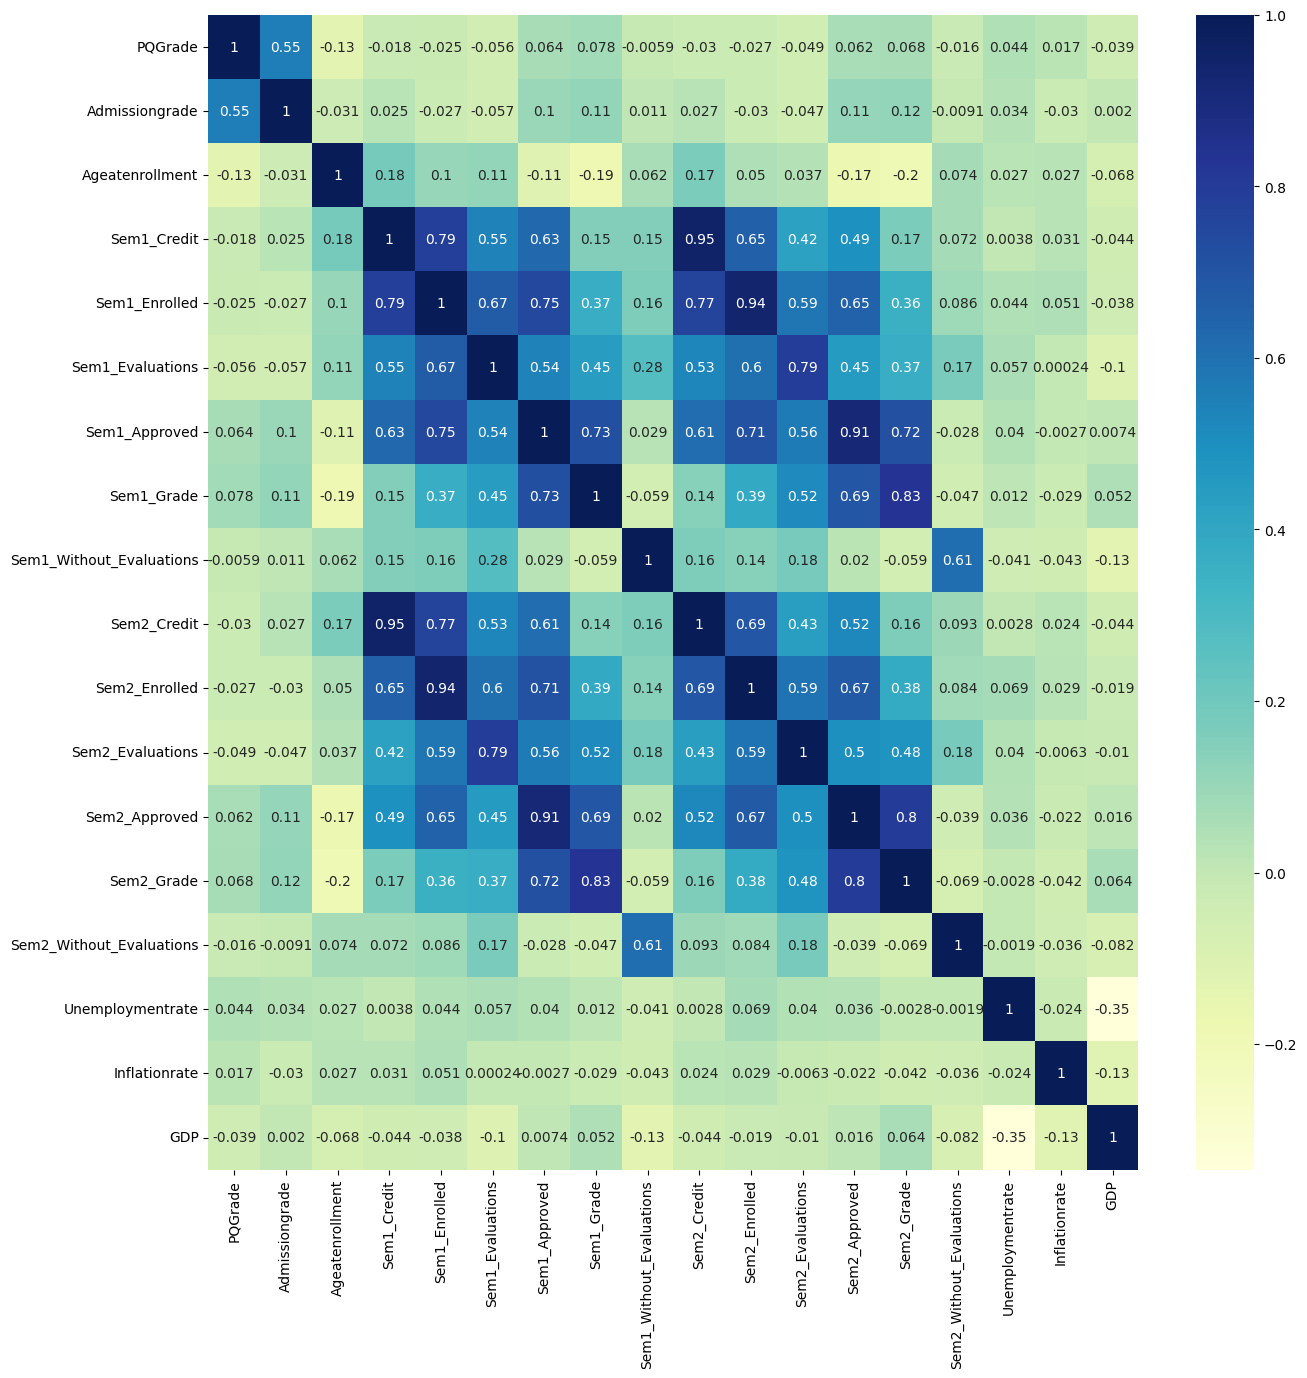

In [31]:
plt.figure(figsize = (15, 15))
sns.heatmap(Correlation, cmap = "YlGnBu", annot = True)
plt.show()

In [32]:
from scipy.stats import skew, kurtosis

num_col = df.select_dtypes(include = [np.number])
for i in num_col: 
    print(f"Skewness of {i}: ", df[i].skew())
    print(f"Kurtosis of {i}: ", kurtosis(df[i], fisher = False))
    print("*" * 60, "\n")

Skewness of PQGrade:  0.28655530952527275
Kurtosis of PQGrade:  3.986824678351603
************************************************************ 

Skewness of Admissiongrade:  0.5133339232409478
Kurtosis of Admissiongrade:  3.616756485535916
************************************************************ 

Skewness of Ageatenrollment:  1.8438779613176142
Kurtosis of Ageatenrollment:  6.159497107528413
************************************************************ 

Skewness of Sem1_Credit:  4.123293252074102
Kurtosis of Sem1_Credit:  21.50795610870158
************************************************************ 

Skewness of Sem1_Enrolled:  1.7517311527046933
Kurtosis of Sem1_Enrolled:  12.454698160189096
************************************************************ 

Skewness of Sem1_Evaluations:  1.0317894987251048
Kurtosis of Sem1_Evaluations:  8.562184718470784
************************************************************ 

Skewness of Sem1_Approved:  0.8413315087151728
Kurtosis of Sem1_App

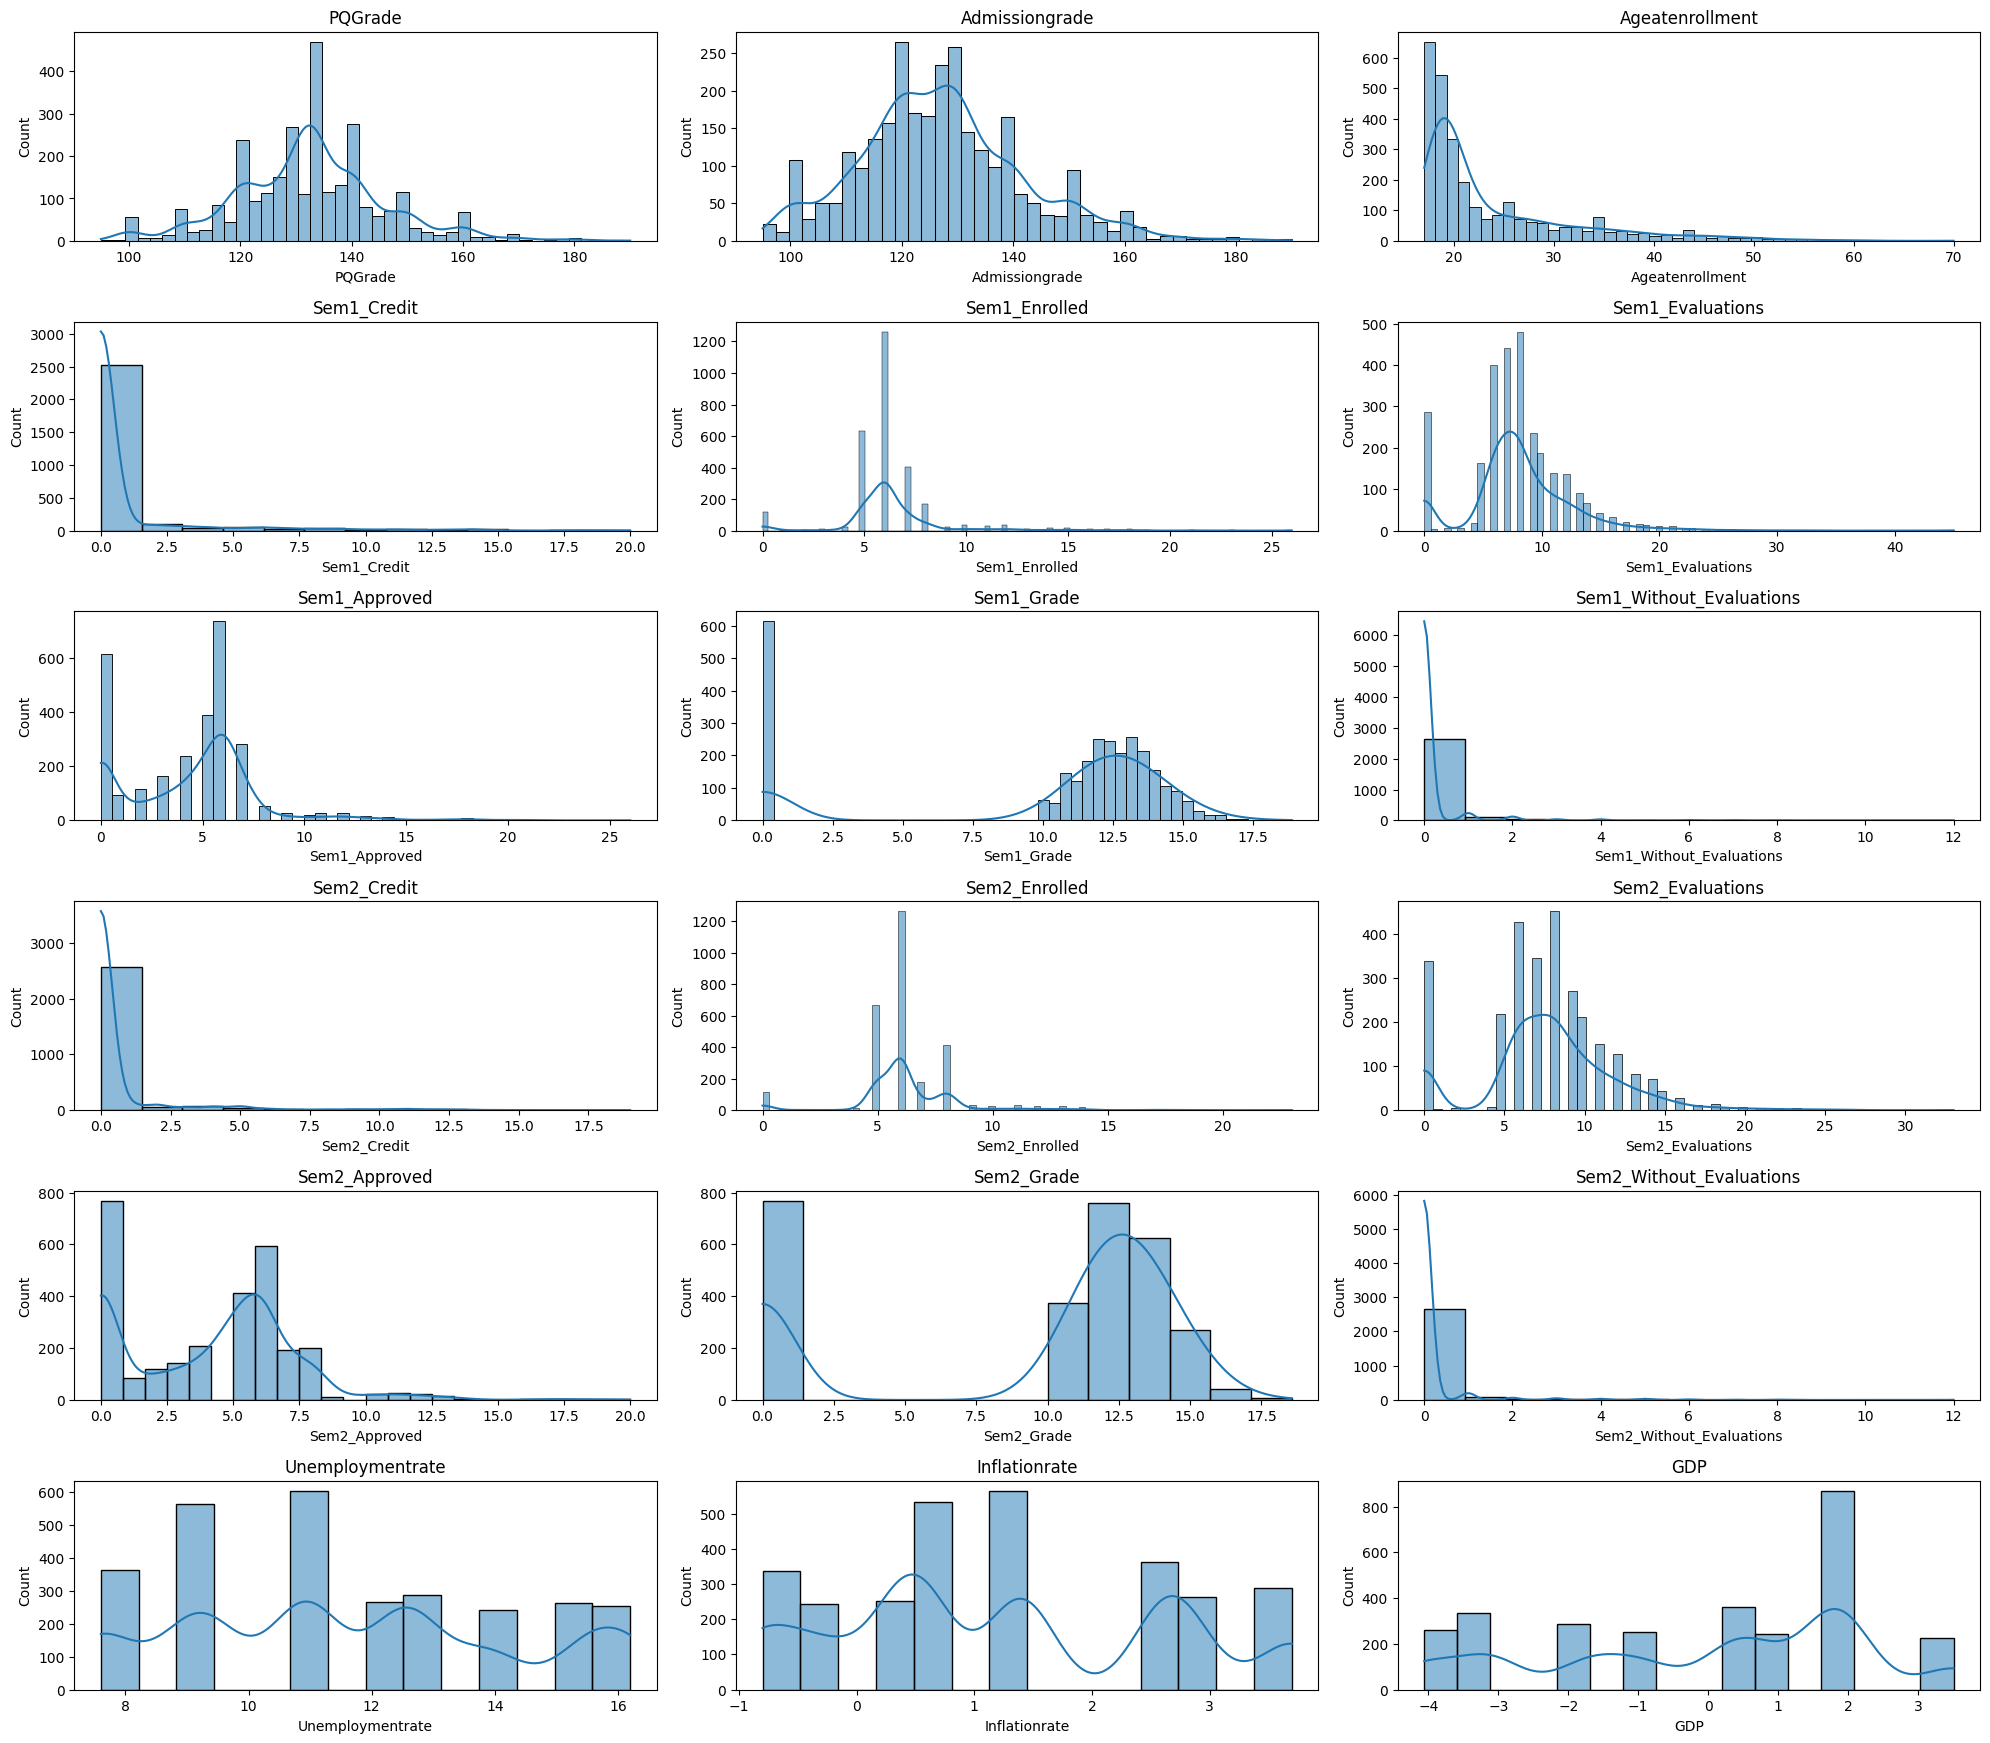

In [33]:
plt.figure(figsize = (20, 20))
num_col = df.select_dtypes(include = [np.number])
j = 0
for i in num_col: 
    plt.subplot(7, 3, j+1)
    sns.histplot(df[i], kde = True)
    plt.title(i)
    j += 1

plt.tight_layout()
plt.show()

The above insight mainly shows skewness in semesters 1 & 2 which need to be transformed.

# Data Preprocessing <a class = "anchor" id = "6"></a>

## Remove Unnecessary columns <a class = 'anchor' id = '6.1'></a>

In [34]:
df.columns

Index(['Maritalstatus', 'Applicationmode', 'Application_form_no.', 'Course',
       'Attendance', 'PQ', 'PQGrade', 'Nationality', 'M/Q', 'F/Q', 'M/O',
       'F/O', 'Admissiongrade', 'Displaced', 'Educationalspecialneeds',
       'Debtor', 'TuitionFeesStatus', 'Gender', 'Scholarshipholder',
       'Ageatenrollment', 'International', 'Sem1_Credit', 'Sem1_Enrolled',
       'Sem1_Evaluations', 'Sem1_Approved', 'Sem1_Grade',
       'Sem1_Without_Evaluations', 'Sem2_Credit', 'Sem2_Enrolled',
       'Sem2_Evaluations', 'Sem2_Approved', 'Sem2_Grade',
       'Sem2_Without_Evaluations', 'Unemploymentrate', 'Inflationrate', 'GDP',
       'Target'],
      dtype='object')

In [35]:
df.drop(["Nationality", "Sem1_Credit", "Sem1_Without_Evaluations", "Sem2_Credit", "Sem2_Without_Evaluations", "M/Q", "M/O", 
         "Maritalstatus", "PQ"], axis = 1, inplace = True)

Two columns Nationality and International give the same insight. 

## Outlier Detection and treatment <a class = 'anchor' id = '6.2'></a>

**Three methods for Outlier detection are the Z-score method, the Mean function method, Inter-Quartile method. These three methods are treated by capping.**

### Z-Score method 

In [36]:
Z_Score_df = df.copy()
num_col = Z_Score_df.select_dtypes(include = [np.number])

for i in num_col: 
    mean = Z_Score_df[i].mean()
    sigma = Z_Score_df[i].std()

    # Replacing the column value with z-score
    Z_Score_df[i] = (Z_Score_df[i] - mean) / sigma
    
    # Capping 
    Z_Score_df.loc[Z_Score_df[i] > 3, i] = 3
    Z_Score_df.loc[Z_Score_df[i] < -3, i] = -3
Z_Score_df

,Applicationmode,Application_form_no.,Course,Attendance,PQGrade,F/Q,F/O,Admissiongrade,Displaced,Educationalspecialneeds,...,Sem1_Approved,Sem1_Grade,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Unemploymentrate,Inflationrate,GDP,Target
0,17,5,171,1,-0.798480,12,9,0.021226,1,0,...,-1.336980,-1.857396,-2.770245,-1.856486,-1.263045,-1.607294,-0.307654,0.105497,0.788347,Dropout
2,1,5,9070,1,-0.798480,37,9,-0.147844,1,0,...,-1.336980,-1.857396,-0.096737,-1.856486,-1.263045,-1.607294,-0.307654,0.105497,0.788347,Dropout
7,18,4,9254,1,-1.025365,37,9,-0.939089,1,0,...,-1.336980,-1.857396,-0.542321,-0.651064,-1.263045,-1.607294,1.441499,1.109928,-1.770887,Dropout
9,1,1,9238,1,0.411569,19,7,-0.269574,1,0,...,0.178172,0.263682,-0.096737,1.518696,-0.642548,0.720750,-1.014759,0.105497,1.569355,Dropout
12,1,2,9853,1,0.033429,37,9,0.217347,1,0,...,-1.336980,-1.857396,-0.096737,-1.856486,-1.263045,-1.607294,0.399450,1.755634,-0.729544,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1,4,9773,1,-0.798480,19,7,-0.404829,1,0,...,0.481202,0.667696,-0.096737,-0.409979,0.598445,0.692009,0.846042,-1.114169,0.369162,Graduate
205,1,1,9238,1,-0.042200,34,0,-0.533322,1,0,...,-0.124859,0.189258,-0.096737,0.313274,-0.022051,0.246519,-1.498567,0.966438,0.161776,Graduate
1253,1,1,9238,1,-0.495968,38,8,-0.019351,1,0,...,-0.124859,0.514862,-0.096737,-0.168895,0.598445,0.347113,-1.498567,0.966438,0.161776,Graduate
3037,1,1,9670,1,-0.495968,1,10,-0.019351,1,0,...,0.481202,0.778446,-0.096737,0.313274,0.598445,0.634526,-1.014759,0.105497,1.569355,Graduate


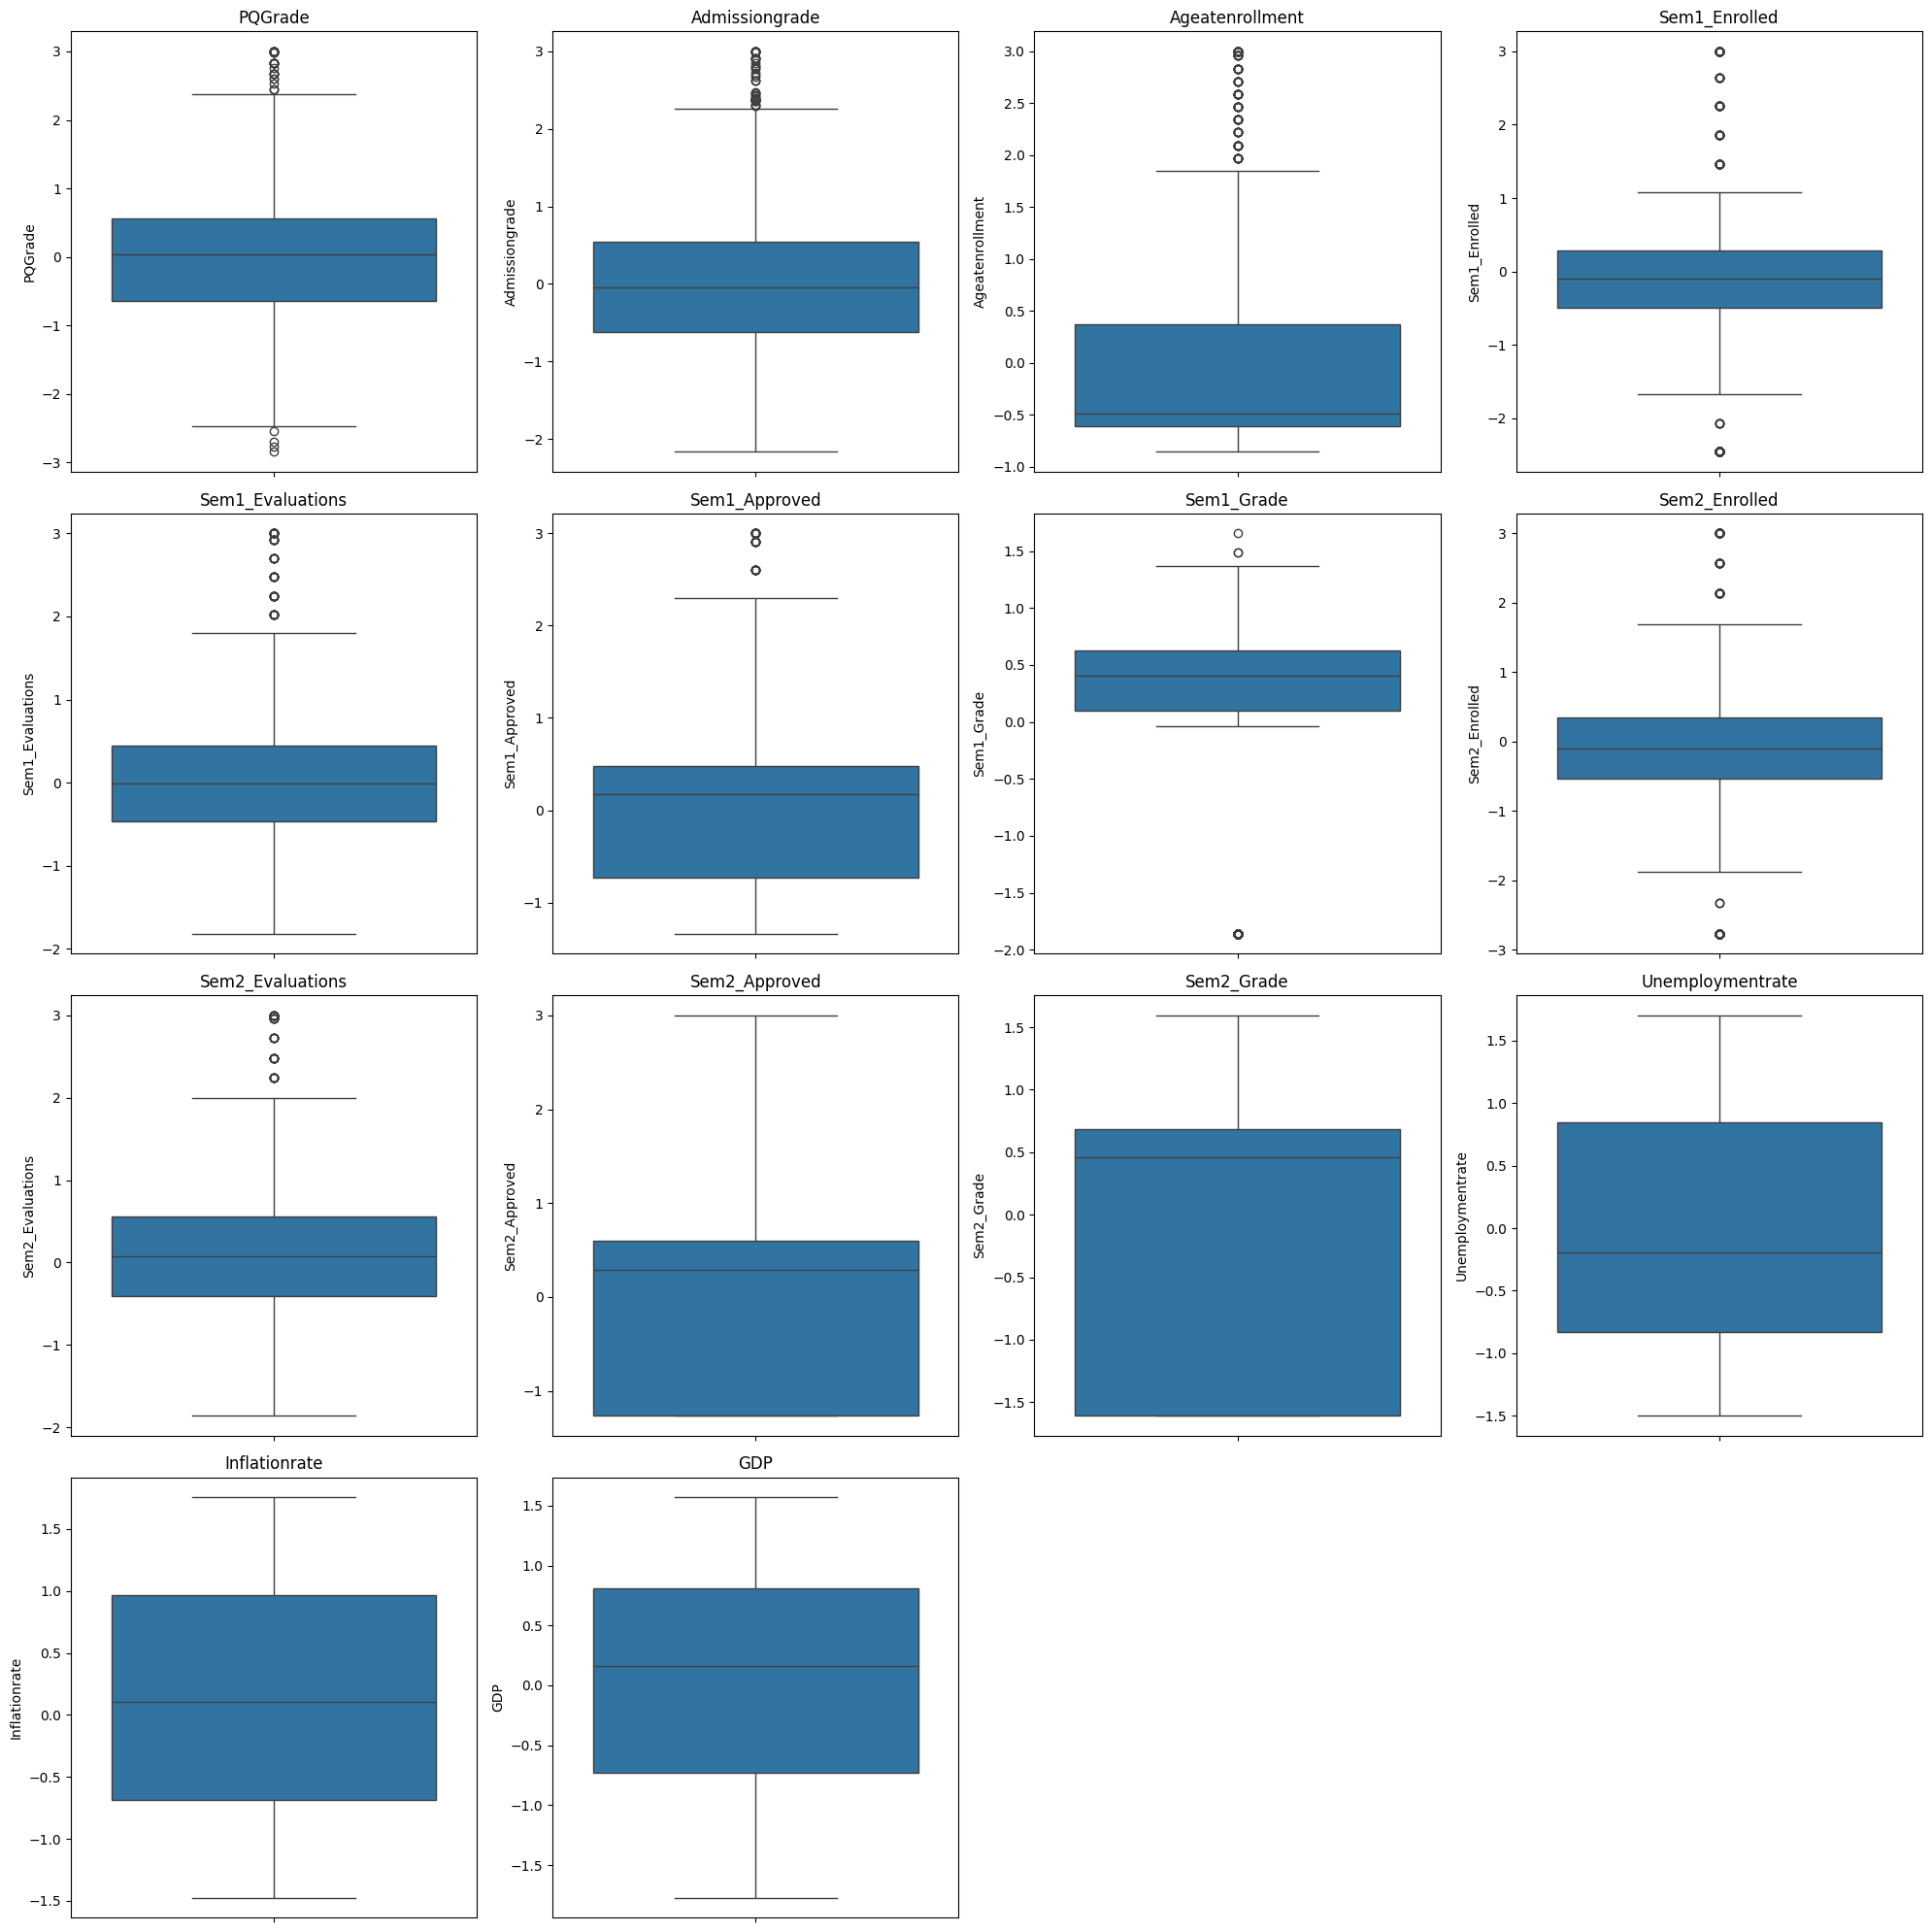

In [37]:
plt.figure(figsize = (20, 20))
num_col = Z_Score_df.select_dtypes(include = [np.number])
j = 0
for i in num_col: 
    plt.subplot(4, 4, j+1)
    sns.boxplot(Z_Score_df[i])
    plt.title(i)
    j += 1

plt.tight_layout()
plt.show()

### Mean Function method 

In [38]:
MF_df = df.copy()
num_col = MF_df.select_dtypes(include = [np.number])

for i in num_col:
    mu = MF_df[i].mean() 
    sigma = MF_df[i].std()
    LL = mu - 3 * sigma
    UL = mu + 3 * sigma
    LL = round(LL, 0) 
    UL = round(UL, 0)
    
    # Capping 
    MF_df.loc[df[i] < LL, i] = LL
    MF_df.loc[df[i] > UL, i] = UL 
MF_df

,Applicationmode,Application_form_no.,Course,Attendance,PQGrade,F/Q,F/O,Admissiongrade,Displaced,Educationalspecialneeds,...,Sem1_Approved,Sem1_Grade,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Unemploymentrate,Inflationrate,GDP,Target
0,17,5,171,1,122.0,12,9,127.3,1,0,...,0,0.000000,0,0,0,0.000000,10.8,1.4,1.74,Dropout
2,1,5,9070,1,122.0,37,9,124.8,1,0,...,0,0.000000,6,0,0,0.000000,10.8,1.4,1.74,Dropout
7,18,4,9254,1,119.0,37,9,113.1,1,0,...,0,0.000000,5,5,0,0.000000,15.5,2.8,-4.06,Dropout
9,1,1,9238,1,138.0,19,7,123.0,1,0,...,5,11.400000,6,14,2,13.500000,8.9,1.4,3.51,Dropout
12,1,2,9853,1,133.0,37,9,130.2,1,0,...,0,0.000000,6,0,0,0.000000,12.7,3.7,-1.70,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1,4,9773,1,122.0,19,7,121.0,1,0,...,6,13.571429,6,6,6,13.333333,13.9,-0.3,0.79,Graduate
205,1,1,9238,1,132.0,34,0,119.1,1,0,...,4,11.000000,6,9,4,10.750000,7.6,2.6,0.32,Graduate
1253,1,1,9238,1,126.0,38,8,126.7,1,0,...,4,12.750000,6,7,6,11.333333,7.6,2.6,0.32,Graduate
3037,1,1,9670,1,126.0,1,10,126.7,1,0,...,6,14.166667,6,9,6,13.000000,8.9,1.4,3.51,Graduate


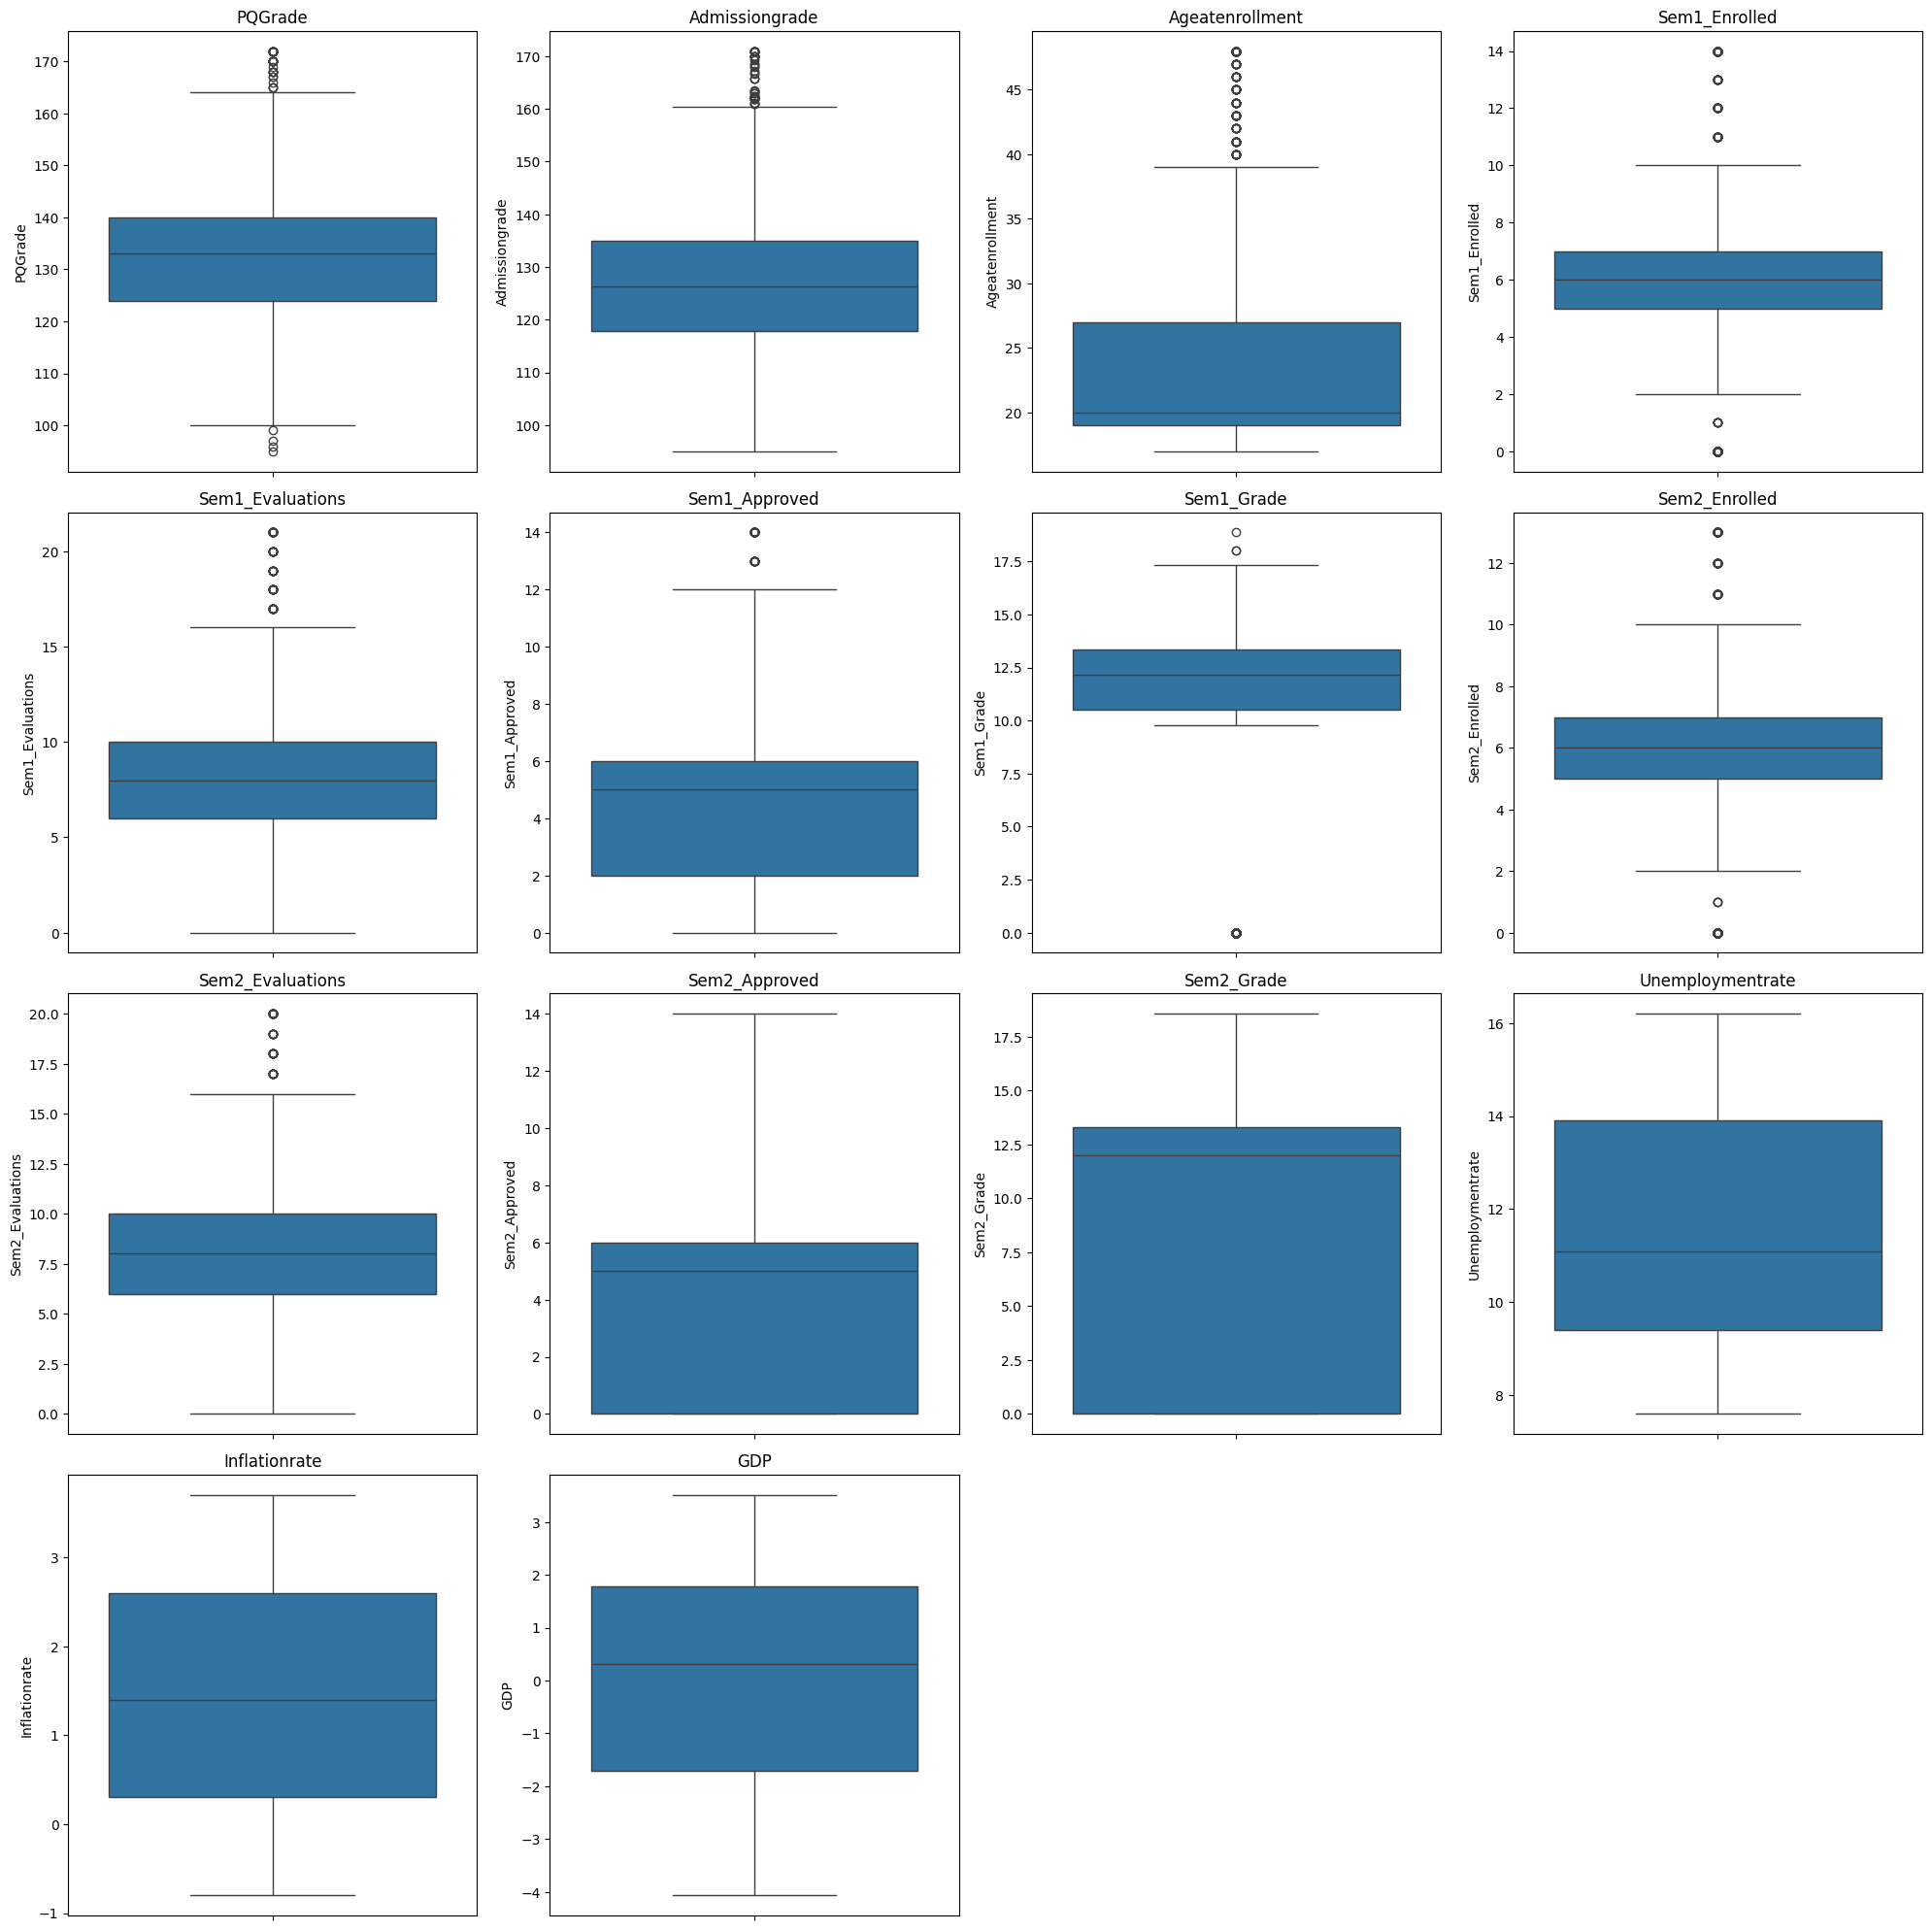

In [39]:
plt.figure(figsize = (20, 20))
num_col = MF_df.select_dtypes(include = [np.number])
j = 0
for i in num_col: 
    plt.subplot(4, 4, j+1)
    sns.boxplot(MF_df[i])
    plt.title(i)
    j += 1

plt.tight_layout()
plt.show()

### Inter-Quartile Range

In [40]:
IQR_df = df.copy()
num_col = IQR_df.select_dtypes(include = [np.number]) 

for i in num_col: 
    Q1 = IQR_df[i].quantile(0.25)
    Q3 = IQR_df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR # Upper Whisker
    LL = Q1 - 1.5 * IQR # Lower Whisker
    UL = round(UL, 0) # To avoid error or warning (some attributes are integers) 
    LL = round(LL, 0)
    # Capping
    IQR_df.loc[IQR_df[i] > UL, i] = UL 
    IQR_df.loc[IQR_df[i] < LL, i] = LL

IQR_df

,Applicationmode,Application_form_no.,Course,Attendance,PQGrade,F/Q,F/O,Admissiongrade,Displaced,Educationalspecialneeds,...,Sem1_Approved,Sem1_Grade,Sem2_Enrolled,Sem2_Evaluations,Sem2_Approved,Sem2_Grade,Unemploymentrate,Inflationrate,GDP,Target
0,17,5,171,1,122.0,12,9,127.3,1,0,...,0,6.000000,2,0,0,0.000000,10.8,1.4,1.74,Dropout
2,1,5,9070,1,122.0,37,9,124.8,1,0,...,0,6.000000,6,0,0,0.000000,10.8,1.4,1.74,Dropout
7,18,4,9254,1,119.0,37,9,113.1,1,0,...,0,6.000000,5,5,0,0.000000,15.5,2.8,-4.06,Dropout
9,1,1,9238,1,138.0,19,7,123.0,1,0,...,5,11.400000,6,14,2,13.500000,8.9,1.4,3.51,Dropout
12,1,2,9853,1,133.0,37,9,130.2,1,0,...,0,6.000000,6,0,0,0.000000,12.7,3.7,-1.70,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1,4,9773,1,122.0,19,7,121.0,1,0,...,6,13.571429,6,6,6,13.333333,13.9,-0.3,0.79,Graduate
205,1,1,9238,1,132.0,34,0,119.1,1,0,...,4,11.000000,6,9,4,10.750000,7.6,2.6,0.32,Graduate
1253,1,1,9238,1,126.0,38,8,126.7,1,0,...,4,12.750000,6,7,6,11.333333,7.6,2.6,0.32,Graduate
3037,1,1,9670,1,126.0,1,10,126.7,1,0,...,6,14.166667,6,9,6,13.000000,8.9,1.4,3.51,Graduate


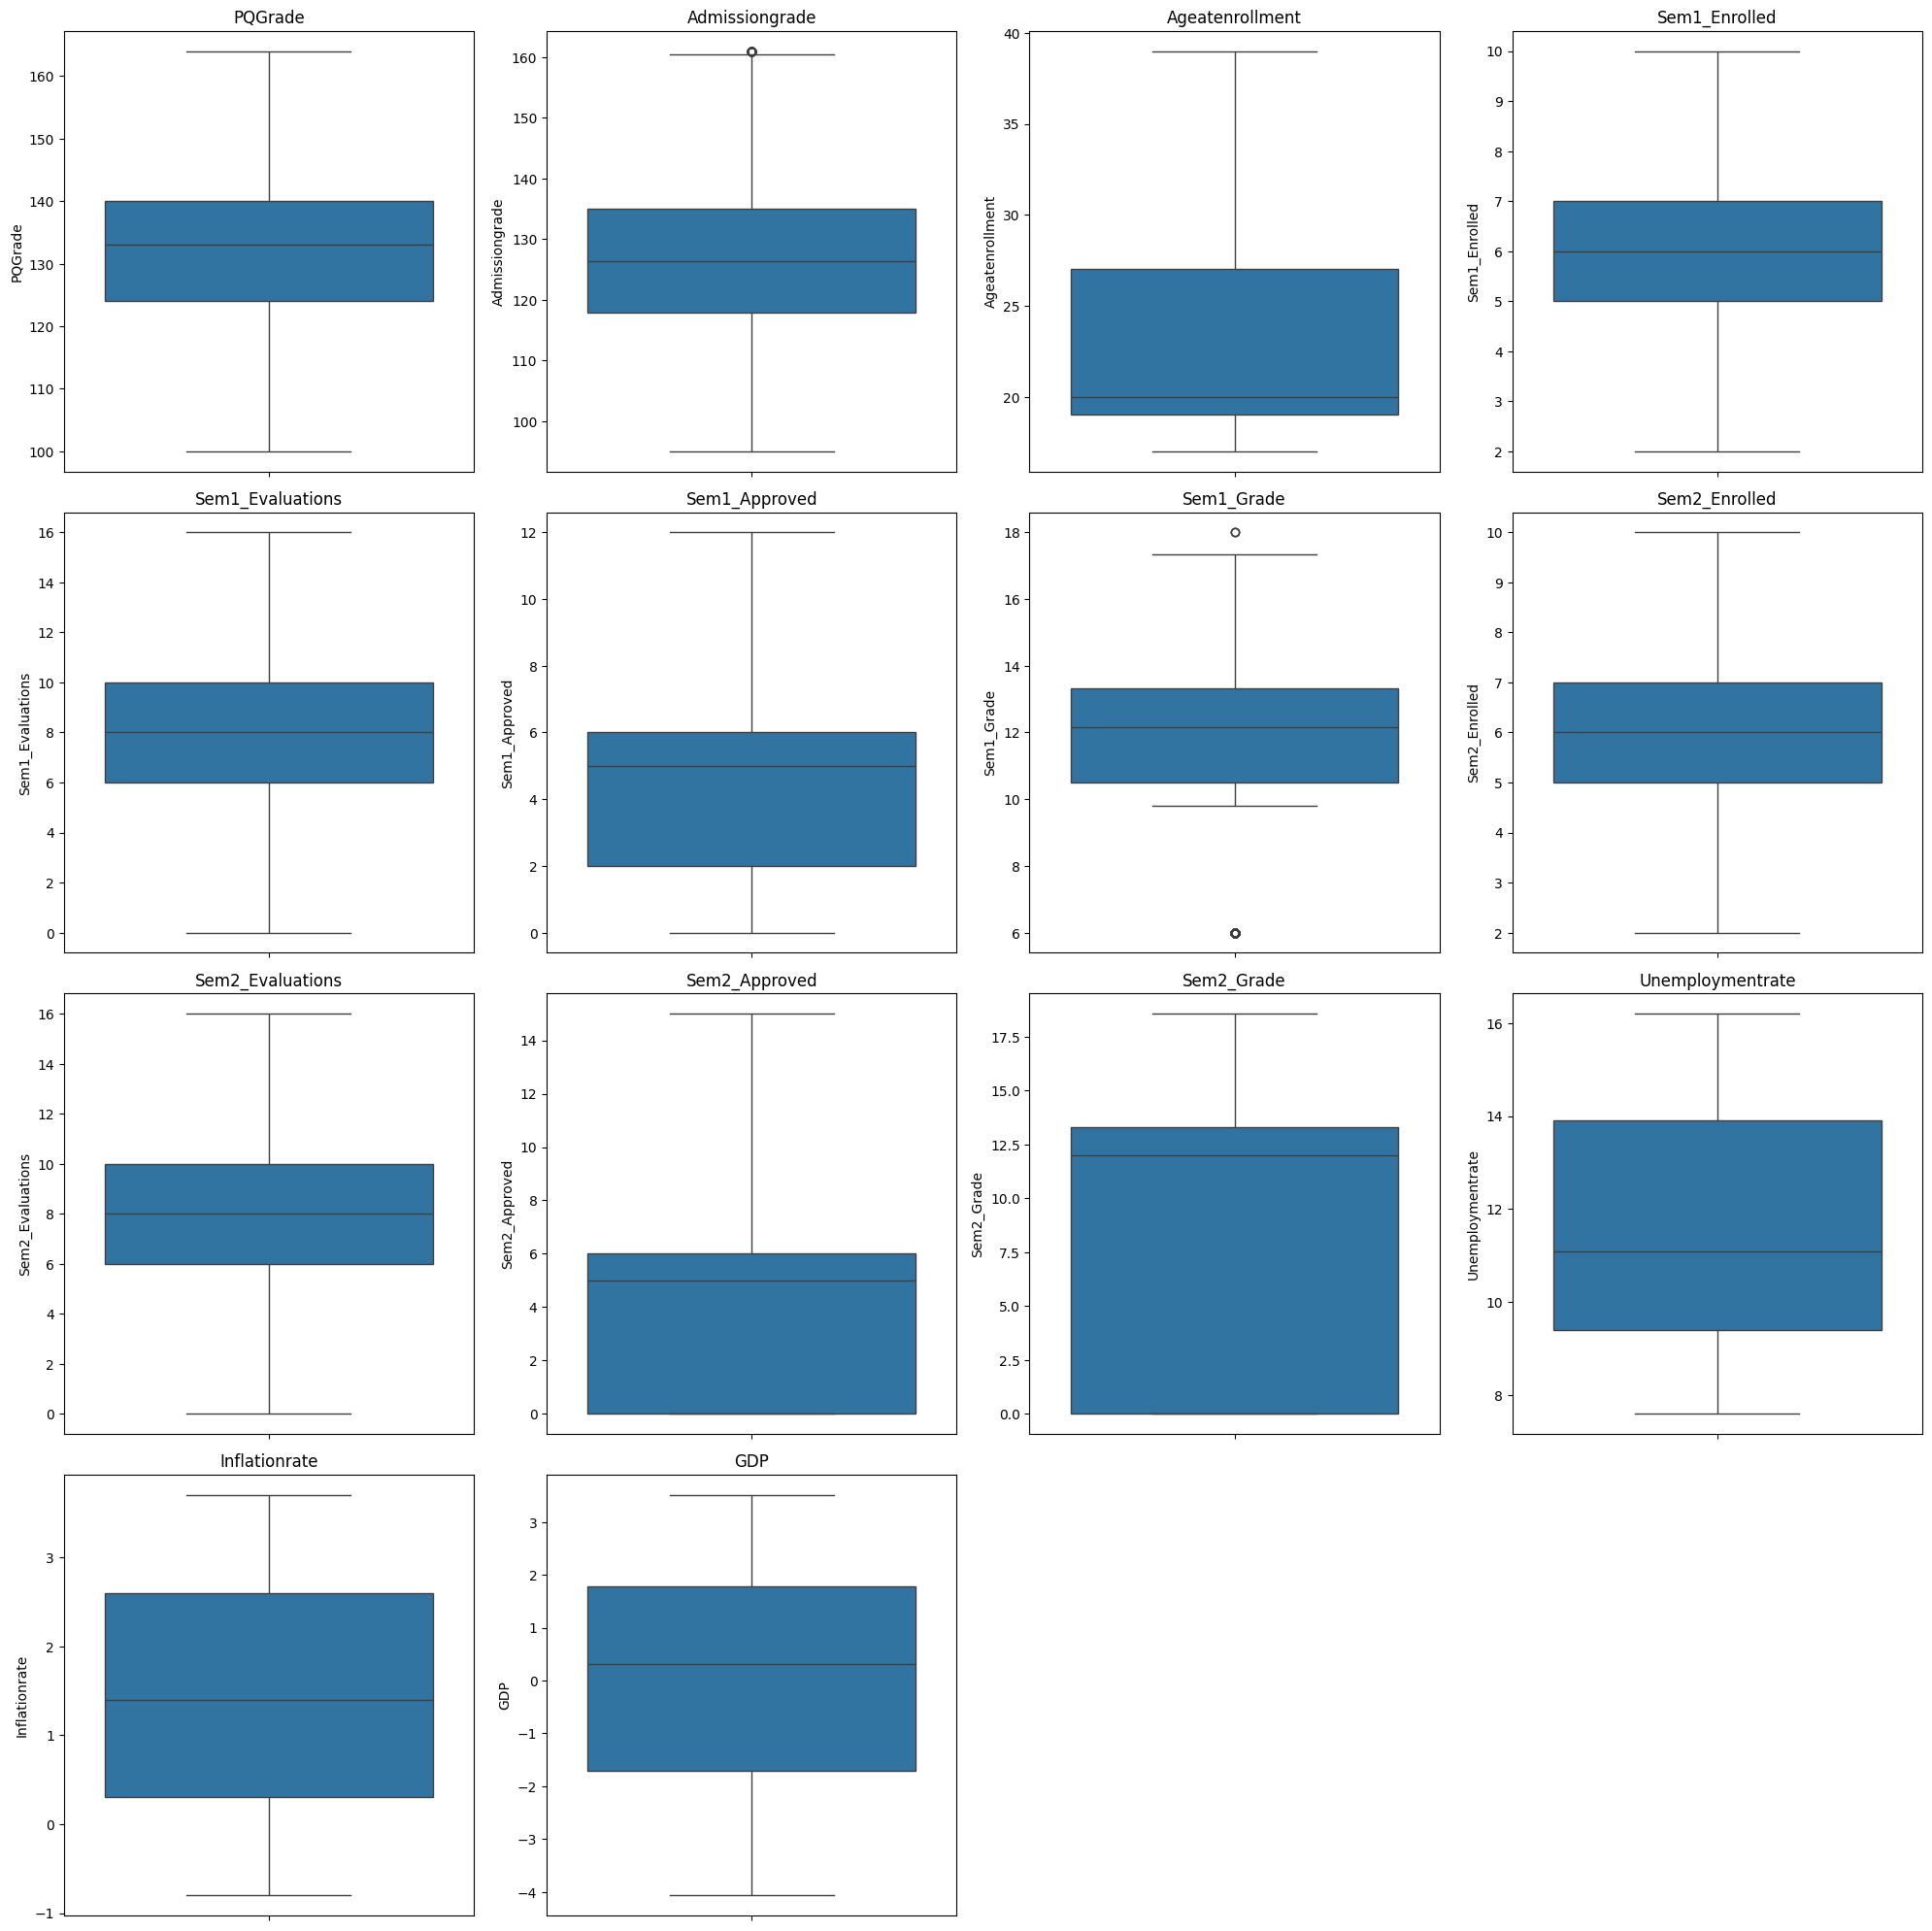

In [41]:
plt.figure(figsize = (20, 20))
num_col = IQR_df.select_dtypes(include = [np.number])
j = 0
for i in num_col: 
    plt.subplot(4, 4, j+1)
    sns.boxplot(IQR_df[i])
    plt.title(i)
    j += 1

plt.tight_layout()
plt.show()

From these three methods, it is clear that Inter quartile method is good for outlier detection for this data. 

## Skewness <a class = 'anchor' id = '6.3'></a>

In [42]:
from scipy.stats import skew, kurtosis

num_col = IQR_df.select_dtypes(include = [np.number])
for i in num_col: 
    print(f"Skewness of {i}: ", df[i].skew())
    print(f"Kurtosis of {i}: ", kurtosis(df[i], fisher = False))
    print("*" * 60, "\n")

Skewness of PQGrade:  0.28655530952527275
Kurtosis of PQGrade:  3.986824678351603
************************************************************ 

Skewness of Admissiongrade:  0.5133339232409478
Kurtosis of Admissiongrade:  3.616756485535916
************************************************************ 

Skewness of Ageatenrollment:  1.8438779613176142
Kurtosis of Ageatenrollment:  6.159497107528413
************************************************************ 

Skewness of Sem1_Enrolled:  1.7517311527046933
Kurtosis of Sem1_Enrolled:  12.454698160189096
************************************************************ 

Skewness of Sem1_Evaluations:  1.0317894987251048
Kurtosis of Sem1_Evaluations:  8.562184718470784
************************************************************ 

Skewness of Sem1_Approved:  0.8413315087151728
Kurtosis of Sem1_Approved:  5.7531993229613
************************************************************ 

Skewness of Sem1_Grade:  -1.1962561054732361
Kurtosis of Sem1_Gr

In [43]:
from scipy.stats import boxcox

parameter = ["Sem1_Enrolled", "Sem1_Evaluations", "Sem1_Approved", "Sem1_Grade", 
             "Sem2_Enrolled", "Sem2_Evaluations", "Sem2_Approved", "Sem2_Grade"] 

IQR_df["Ageatenrollment"] = np.log(IQR_df["Ageatenrollment"])
# Or
# IQR_df["Ageatenrollment"] = boxcox(IQR_df["Ageatenrollment"], lmbda = 0) # lmda = 0 indicate logarithmic transformation
print(f"Skewness of Age at Enrollment: ", IQR_df["Ageatenrollment"].skew())
print(f"Kurtosis of Age at Enrollment: ", kurtosis(IQR_df["Ageatenrollment"], fisher = False))
print("*" * 60, "\n")

for i in parameter: 
    IQR_df[i] = np.sqrt(IQR_df[i]) 
    # Or
    # IQR_df[i] = boxcox(IQR_df[i], lmbda = 0.5) # lmbda = 0.5 indicate Y' = sqrt(Y) i.e., square root transformation
    print(f"Skewness of {i}: ", IQR_df[i].skew())
    print(f"Kurtosis of {i}: ", kurtosis(IQR_df[i], fisher = False))
    print("*" * 60, "\n")

Skewness of Age at Enrollment:  1.0013973491557235
Kurtosis of Age at Enrollment:  2.619506256501324
************************************************************ 

Skewness of Sem1_Enrolled:  -0.6829033979733331
Kurtosis of Sem1_Enrolled:  5.7954785515161085
************************************************************ 

Skewness of Sem1_Evaluations:  -1.5845541022825034
Kurtosis of Sem1_Evaluations:  5.219892350377366
************************************************************ 

Skewness of Sem1_Approved:  -0.7957042059979437
Kurtosis of Sem1_Approved:  2.3016631240877135
************************************************************ 

Skewness of Sem1_Grade:  -0.9559028609047886
Kurtosis of Sem1_Grade:  2.500205947566873
************************************************************ 

Skewness of Sem2_Enrolled:  -0.7113777598306757
Kurtosis of Sem2_Enrolled:  5.557607350487199
************************************************************ 

Skewness of Sem2_Evaluations:  -1.518879075884046

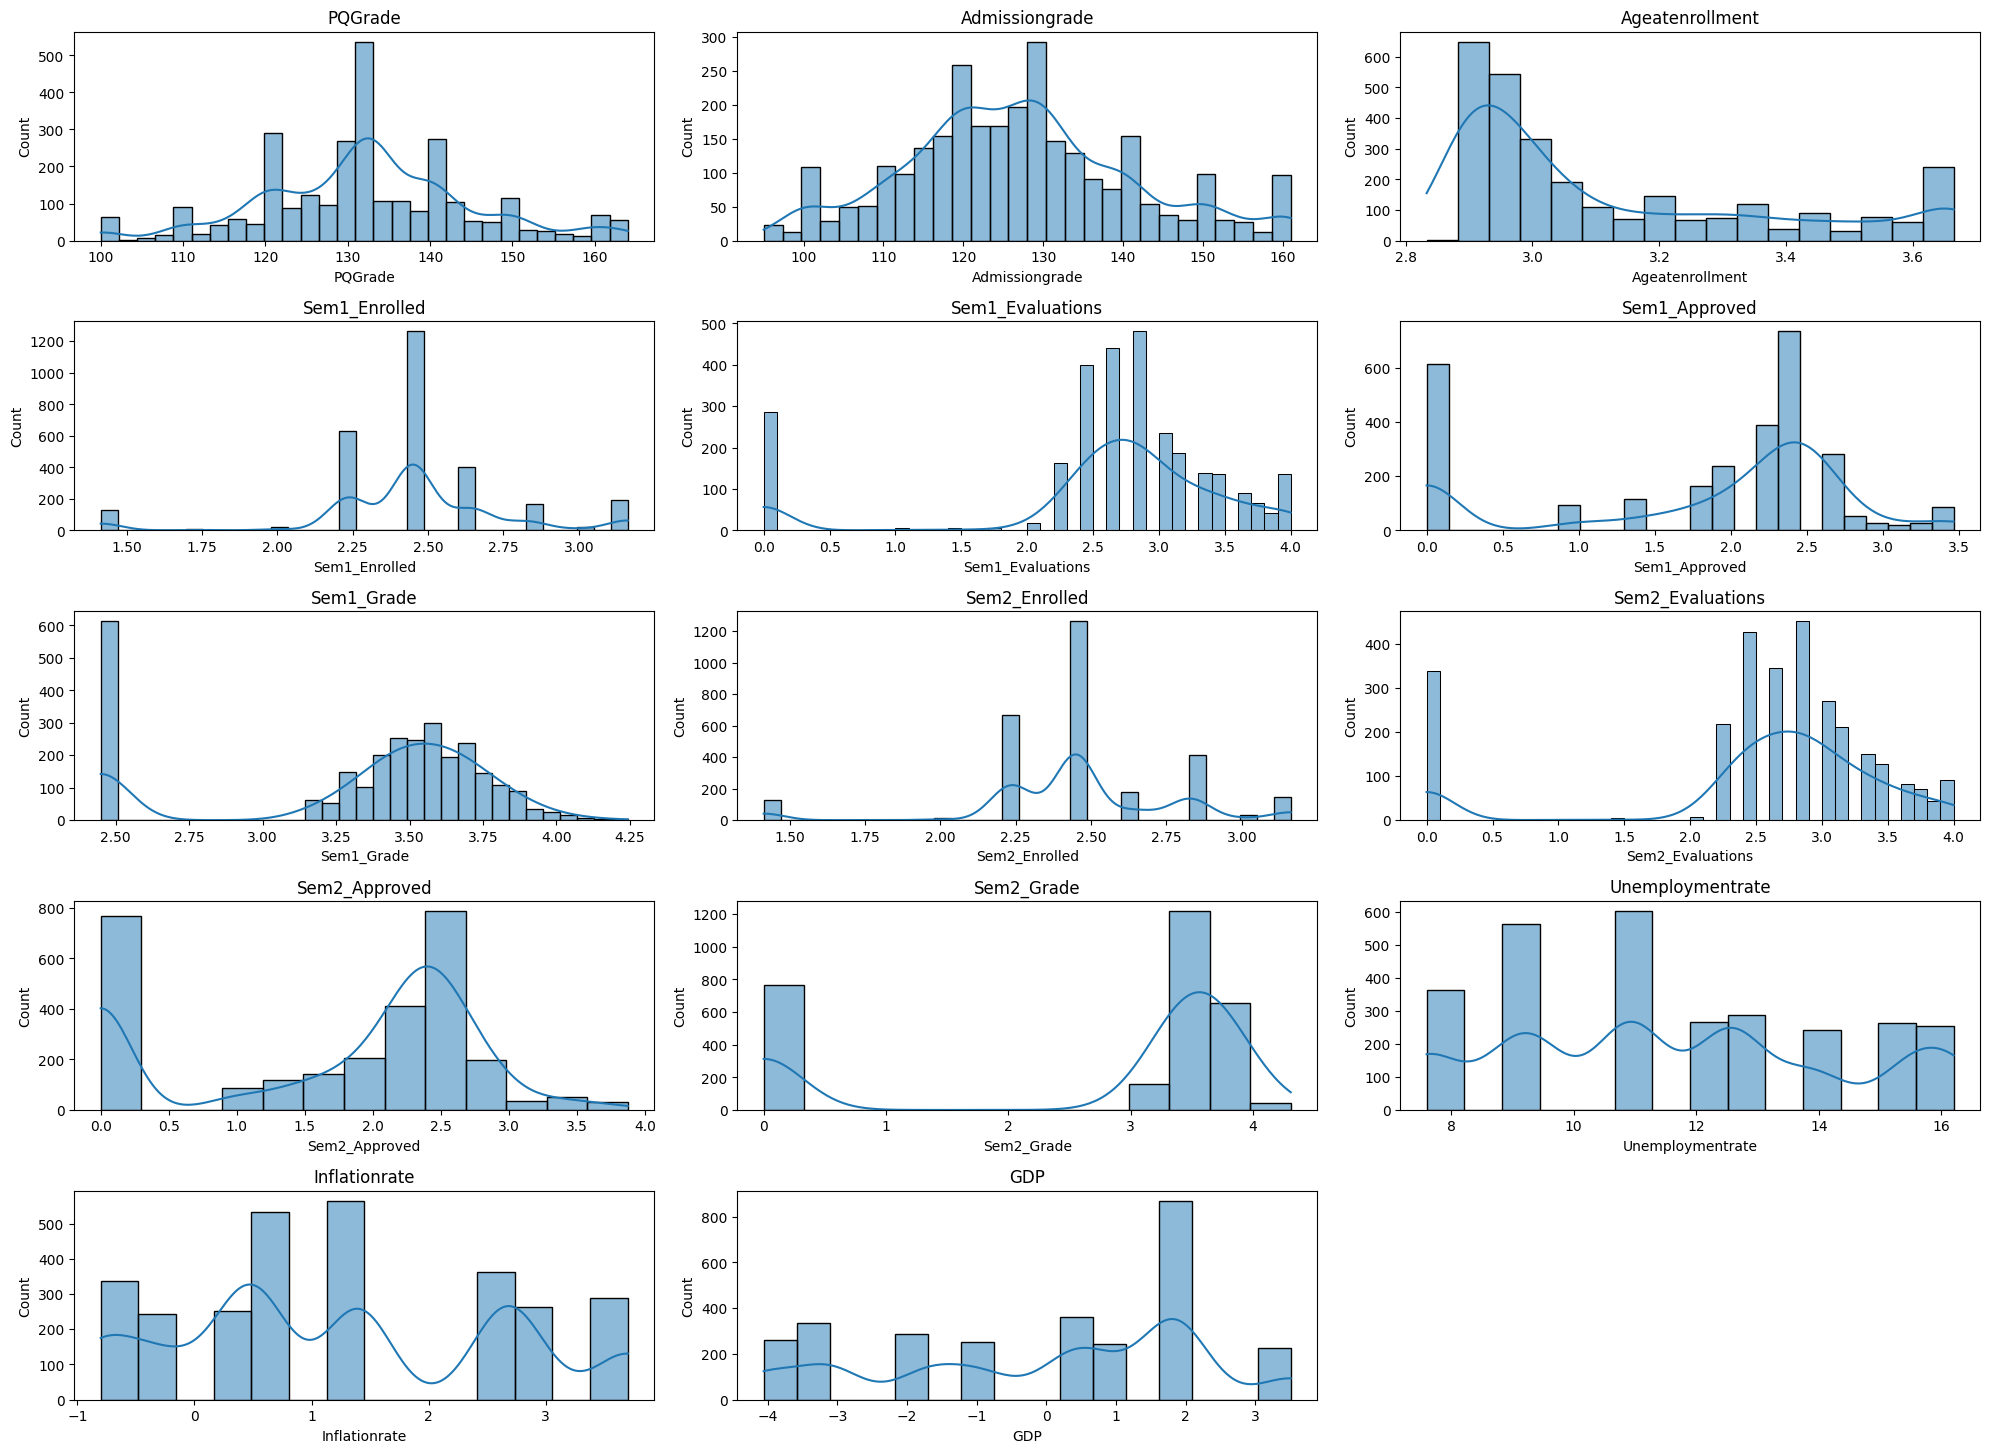

In [44]:
plt.figure(figsize = (20, 20))
num_col = IQR_df.select_dtypes(include = [np.number])
j = 0
for i in num_col: 
    plt.subplot(7, 3, j+1)
    sns.histplot(IQR_df[i], kde = True)
    plt.title(i)
    j += 1

plt.tight_layout()
plt.show()

Here we used logarithmic transformation and square root transformation to remove the skewness of the data to some extent. 

# Visualization <a class = "anchor" id = "7"></a>

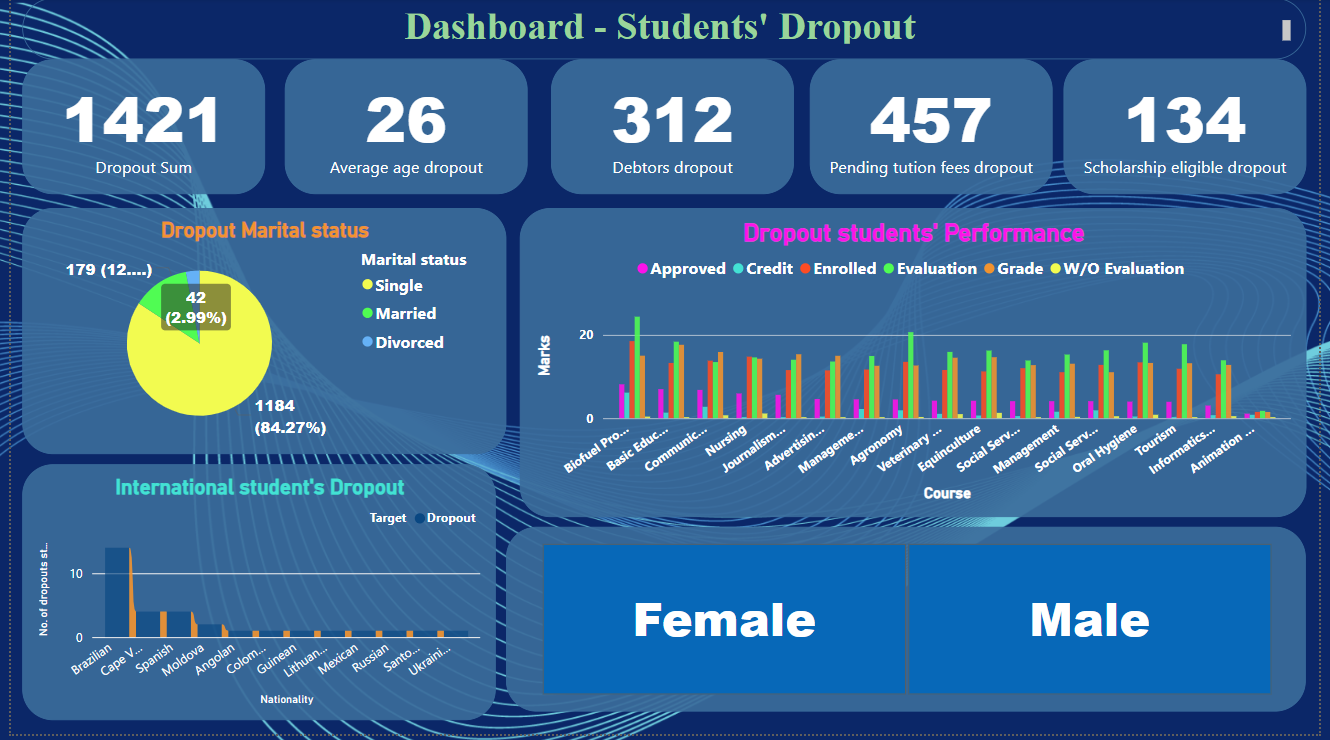

In [45]:
# import image module 
from PIL import Image
from IPython.display import display
  
# get the image 
Dashboard = Image.open("Dashboard.png") 
Dashboard

The link for this dashboard is [DashboardStudentDropout](https://drive.google.com/drive/u/0/folders/1HjoY8sK0XEBWJau3BXn2Em853k8Wo5Yn)

# Feature Engineering <a class = "anchor" id = "8"></a>

## Feature Extraction <a class = 'anchor' id = '8.1'></a>

In [46]:
df["Overall_Enrolled"] = df["Sem1_Enrolled"] + df["Sem2_Enrolled"]
df["Overall_Evaluations"] = df["Sem1_Evaluations"] + df["Sem2_Evaluations"]
df["Overall_Approved"] = df["Sem1_Approved"] + df["Sem2_Approved"] 
df["Overall_Grade"] = df["Sem1_Grade"] + df["Sem2_Grade"] 

In [47]:
df.drop(["Sem1_Enrolled", "Sem1_Evaluations", "Sem1_Approved", "Sem1_Grade", 
         "Sem2_Enrolled", "Sem2_Evaluations", "Sem2_Approved", "Sem2_Grade"], 
        axis = 1, inplace = True)

In [48]:
df

,Applicationmode,Application_form_no.,Course,Attendance,PQGrade,F/Q,F/O,Admissiongrade,Displaced,Educationalspecialneeds,...,Ageatenrollment,International,Unemploymentrate,Inflationrate,GDP,Target,Overall_Enrolled,Overall_Evaluations,Overall_Approved,Overall_Grade
0,17,5,171,1,122.0,12,9,127.3,1,0,...,20,0,10.8,1.4,1.74,Dropout,0,0,0,0.000000
2,1,5,9070,1,122.0,37,9,124.8,1,0,...,19,0,10.8,1.4,1.74,Dropout,12,0,0,0.000000
7,18,4,9254,1,119.0,37,9,113.1,1,0,...,22,0,15.5,2.8,-4.06,Dropout,10,10,0,0.000000
9,1,1,9238,1,138.0,19,7,123.0,1,0,...,18,0,8.9,1.4,3.51,Dropout,12,23,7,24.900000
12,1,2,9853,1,133.0,37,9,130.2,1,0,...,19,0,12.7,3.7,-1.70,Dropout,12,6,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1,4,9773,1,122.0,19,7,121.0,1,0,...,20,0,13.9,-0.3,0.79,Graduate,12,13,12,26.904762
205,1,1,9238,1,132.0,34,0,119.1,1,0,...,18,0,7.6,2.6,0.32,Graduate,12,18,8,21.750000
1253,1,1,9238,1,126.0,38,8,126.7,1,0,...,19,0,7.6,2.6,0.32,Graduate,12,18,10,24.083333
3037,1,1,9670,1,126.0,1,10,126.7,1,0,...,20,0,8.9,1.4,3.51,Graduate,12,15,12,27.166667


Skewness of Overall_Enrolled:  0.14781489254131425
Kurtosis of Overall_Enrolled:  4.542844342016372 

Skewness of Overall_Evaluations:  -0.1218566707506565
Kurtosis of Overall_Evaluations:  3.0973497297019175 

Skewness of Overall_Approved:  0.28319980406575906
Kurtosis of Overall_Approved:  2.9647155648586163 

Skewness of Overall_Grade:  -1.0228772180604015
Kurtosis of Overall_Grade:  2.406392051569665 



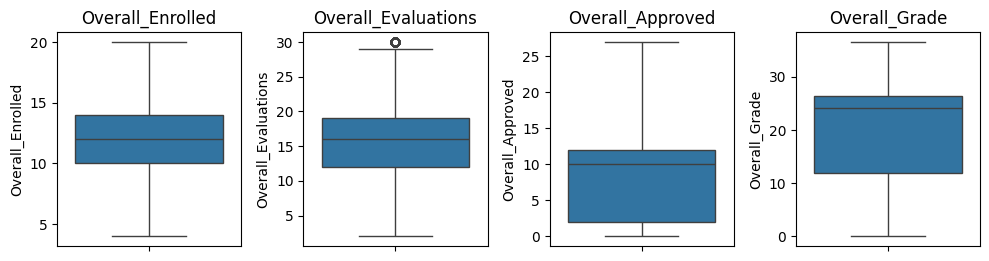

In [49]:
num_col = ["Overall_Enrolled", "Overall_Evaluations", "Overall_Approved", "Overall_Grade"]
j = 0

# Removing Outliers
for i in num_col: 
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR # Upper Whisker
    LL = Q1 - 1.5 * IQR # Lower Whisker
    UL = round(UL, 0) # To avoid error or warning (some attributes are integers) 
    LL = round(LL, 0)
    # Capping
    df.loc[df[i] > UL, i] = UL 
    df.loc[df[i] < LL, i] = LL

for i in num_col: 
    print(f"Skewness of {i}: ", df[i].skew())
    print(f"Kurtosis of {i}: ", kurtosis(df[i], fisher = False), "\n")

plt.figure(figsize=(10, 5))
for i in num_col:
    plt.subplot(2, 4, j+1) 
    sns.boxplot(df[i]) 
    plt.title(i)
    j += 1

plt.tight_layout()
plt.show() 

## Feature Transformation <a class = 'anchor' id = '8.2'></a>

In [50]:
y = df.Target
x = df.drop("Target", axis = 1)

### Encoding

#### One-Hot Encoding

In [51]:
Columns = x.select_dtypes(include = ["object"]).columns
One_Hot_Encode = pd.get_dummies(x, columns = Columns) 
One_Hot_Encode 

,PQGrade,Admissiongrade,Ageatenrollment,Unemploymentrate,Inflationrate,GDP,Overall_Enrolled,Overall_Evaluations,Overall_Approved,Overall_Grade,...,Debtor_0,Debtor_1,TuitionFeesStatus_0,TuitionFeesStatus_1,Gender_0,Gender_1,Scholarshipholder_0,Scholarshipholder_1,International_0,International_1
0,122.0,127.3,20,10.8,1.4,1.74,4,2,0,0.000000,...,True,False,False,True,False,True,True,False,True,False
2,122.0,124.8,19,10.8,1.4,1.74,12,2,0,0.000000,...,True,False,True,False,False,True,True,False,True,False
7,119.0,113.1,22,15.5,2.8,-4.06,10,10,0,0.000000,...,True,False,True,False,False,True,True,False,True,False
9,138.0,123.0,18,8.9,1.4,3.51,12,23,7,24.900000,...,False,True,True,False,True,False,True,False,True,False
12,133.0,130.2,19,12.7,3.7,-1.70,12,6,0,0.000000,...,True,False,False,True,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,122.0,121.0,20,13.9,-0.3,0.79,12,13,12,26.904762,...,True,False,False,True,True,False,True,False,True,False
205,132.0,119.1,18,7.6,2.6,0.32,12,18,8,21.750000,...,True,False,False,True,True,False,True,False,True,False
1253,126.0,126.7,19,7.6,2.6,0.32,12,18,10,24.083333,...,True,False,False,True,True,False,True,False,True,False
3037,126.0,126.7,20,8.9,1.4,3.51,12,15,12,27.166667,...,True,False,False,True,True,False,False,True,True,False


#### Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

lr = LabelEncoder()
y_encoded = lr.fit_transform(y) 

### Scaling

#### Standard Scalar

In [53]:
from sklearn.preprocessing import StandardScaler 

SS_df = StandardScaler()
scaled_x = SS_df.fit_transform(One_Hot_Encode)
print("Scaled x: \n", scaled_x) 
print("\nShape of scaled_x is: ", scaled_x.shape)

Scaled x: 
 [[-0.7986209   0.02122963 -0.48737272 ... -0.56624374  0.15774282
  -0.15774282]
 [-0.7986209  -0.14786961 -0.61042827 ... -0.56624374  0.15774282
  -0.15774282]
 [-1.02554509 -0.93925407 -0.24126162 ... -0.56624374  0.15774282
  -0.15774282]
 ...
 [-0.49605532 -0.01935419 -0.61042827 ... -0.56624374  0.15774282
  -0.15774282]
 [-0.49605532 -0.01935419 -0.48737272 ...  1.76602395  0.15774282
  -0.15774282]
 [ 0.04099859  2.77416532  0.62012723 ... -0.56624374  0.15774282
  -0.15774282]]

Shape of scaled_x is:  (2842, 137)


In [54]:
scaled_x = pd.DataFrame(scaled_x, columns = One_Hot_Encode.columns)
scaled_x

,PQGrade,Admissiongrade,Ageatenrollment,Unemploymentrate,Inflationrate,GDP,Overall_Enrolled,Overall_Evaluations,Overall_Approved,Overall_Grade,...,Debtor_0,Debtor_1,TuitionFeesStatus_0,TuitionFeesStatus_1,Gender_0,Gender_1,Scholarshipholder_0,Scholarshipholder_1,International_0,International_1
0,-0.798621,0.021230,-0.487373,-0.307708,0.105516,0.788486,-2.634719,-1.987329,-1.370962,-1.806229,...,0.395253,-0.395253,-0.448535,0.448535,-1.336516,1.336516,0.566244,-0.566244,0.157743,-0.157743
1,-0.798621,-0.147870,-0.610428,-0.307708,0.105516,0.788486,-0.096780,-1.987329,-1.370962,-1.806229,...,0.395253,-0.395253,2.229482,-2.229482,-1.336516,1.336516,0.566244,-0.566244,0.157743,-0.157743
2,-1.025545,-0.939254,-0.241262,1.441752,1.110123,-1.771199,-0.731265,-0.823395,-1.370962,-1.806229,...,0.395253,-0.395253,2.229482,-2.229482,-1.336516,1.336516,0.566244,-0.566244,0.157743,-0.157743
3,0.411641,-0.269621,-0.733484,-1.014937,0.105516,1.569631,-0.096780,1.067997,-0.230891,0.523691,...,-2.530028,2.530028,2.229482,-2.229482,0.748214,-0.748214,0.566244,-0.566244,0.157743,-0.157743
4,0.033434,0.217385,-0.610428,0.399521,1.755943,-0.729672,-0.096780,-1.405362,-1.370962,-1.806229,...,0.395253,-0.395253,-0.448535,0.448535,0.748214,-0.748214,0.566244,-0.566244,0.157743,-0.157743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2837,-0.798621,-0.404900,-0.487373,0.846191,-1.114365,0.369227,-0.096780,-0.386920,0.583445,0.711279,...,0.395253,-0.395253,-0.448535,0.448535,0.748214,-0.748214,0.566244,-0.566244,0.157743,-0.157743
2838,-0.042207,-0.533416,-0.733484,-1.498831,0.966608,0.161804,-0.096780,0.340539,-0.068024,0.228942,...,0.395253,-0.395253,-0.448535,0.448535,0.748214,-0.748214,0.566244,-0.566244,0.157743,-0.157743
2839,-0.496055,-0.019354,-0.610428,-1.498831,0.966608,0.161804,-0.096780,0.340539,0.257711,0.447275,...,0.395253,-0.395253,-0.448535,0.448535,0.748214,-0.748214,0.566244,-0.566244,0.157743,-0.157743
2840,-0.496055,-0.019354,-0.487373,-1.014937,0.105516,1.569631,-0.096780,-0.095936,0.583445,0.735786,...,0.395253,-0.395253,-0.448535,0.448535,0.748214,-0.748214,-1.766024,1.766024,0.157743,-0.157743


Converted the transformed array to data frame.

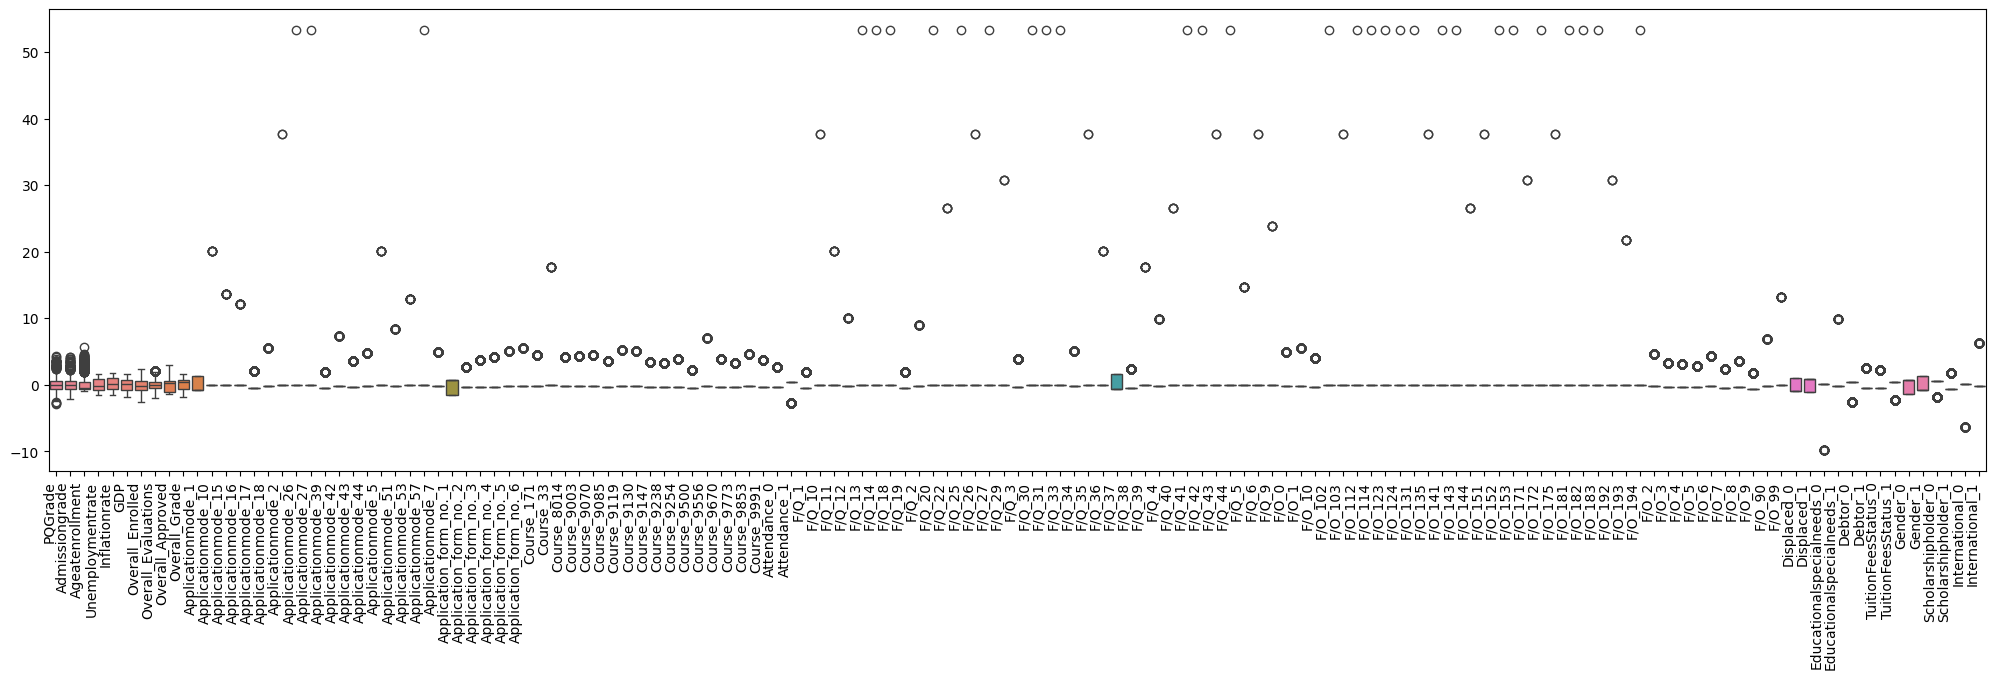

In [55]:
plt.figure(figsize = (25, 6))
sns.boxplot(scaled_x)
plt.xticks(rotation = 90, ha = "right")
plt.show()

Here the boxplot are scaled.

# Data Splitting <a class = "anchor" id = "9"></a>

In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y_encoded, test_size = 0.2, random_state = 42)

# Model Selection <a class = 'anchor' id = "10"></a>

**Logistic regression, SVC, Decision Tree, Multi Layer Perceptron, GaussianNB, Random Forest, Gradient Boosting, Adaptive Boost**

# Model Training & Model Evaluation <a class = 'anchor' id = '11'></a>

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC Score
0,Logistic Regression,0.912127,0.913194,0.894558,0.932624,0.912305
1,Decision Tree,0.859402,0.863481,0.832237,0.897163,0.859731
2,MLP Classifier,0.875220,0.878632,0.848185,0.911348,0.875534
3,Naive Bayes,0.773286,0.787479,0.735385,0.847518,0.773933
4,Random Forest,0.898067,0.901024,0.868421,0.936170,0.898399
5,Gradient Boosting,0.896309,0.898100,0.875421,0.921986,0.896533
6,AdaBoost,0.899824,0.901554,0.878788,0.925532,0.900048


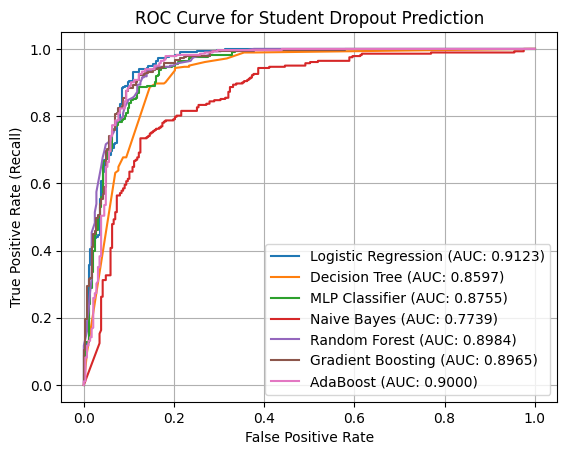

In [58]:
models = {
    'Logistic Regression': LogisticRegression(), 
    'Decision Tree': DecisionTreeClassifier(max_depth=5),  # Experiment with depth and other parameters
    'MLP Classifier': MLPClassifier(),  # Adjust hidden layer structure and activation functions
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),  # Experiment with number of trees and other parameters
    'Gradient Boosting': GradientBoostingClassifier(),  # Experiment with learning rate, max depth, etc.
    'AdaBoost': AdaBoostClassifier()
}

model_name = []
ac = []
f = []
pre = []
re = [] 
roc = []

for name, model in models.items(): 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)

    model_name.append(name)
    ac.append(accuracy)
    f.append(f1)
    pre.append(precision)
    re.append(recall)
    roc.append(roc_score) 

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_score:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve for Student Dropout Prediction')
    plt.legend()
    plt.grid(True)

    
Model_evaluation = pd.DataFrame({"Model Name": model_name, "Accuracy": ac, "F1 Score": f, "Precision": pre, "Recall": re, "ROC Score": roc})
Model_evaluation

From above insight, the logistic regression model will be best

# Feature Selection (With Model Training and Model Evaluation)  <a class = "anchor" id = "12"></a>

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.linear_model import Lasso

## Select K Best <a class = 'anchor' id = '12.1'></a>

In [60]:
selector_kbest = SelectKBest(f_classif, k = 17)  
x_kbest = selector_kbest.fit_transform(x_train, y_train)

select_indices_kbest = selector_kbest.get_support(indices = True)
select_features_kbest = x_train.columns[select_indices_kbest]
select_features_kbest


Index(['Admissiongrade', 'Ageatenrollment', 'Overall_Enrolled',
       'Overall_Approved', 'Overall_Grade', 'Applicationmode_1',
       'Applicationmode_39', 'Course_9119', 'Course_9500', 'Debtor_0',
       'Debtor_1', 'TuitionFeesStatus_0', 'TuitionFeesStatus_1', 'Gender_0',
       'Gender_1', 'Scholarshipholder_0', 'Scholarshipholder_1'],
      dtype='object')

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC Score
0,Logistic Regression,0.901582,0.904762,0.869281,0.943262,0.901945
1,Decision Tree,0.868190,0.872666,0.837134,0.911348,0.868566
2,MLP Classifier,0.885764,0.888889,0.858086,0.921986,0.886080
3,Naive Bayes,0.826011,0.839024,0.774775,0.914894,0.826785
4,Random Forest,0.892794,0.895009,0.869565,0.921986,0.893049
5,Gradient Boosting,0.891037,0.892734,0.871622,0.914894,0.891245
6,AdaBoost,0.896309,0.898451,0.872910,0.925532,0.896564


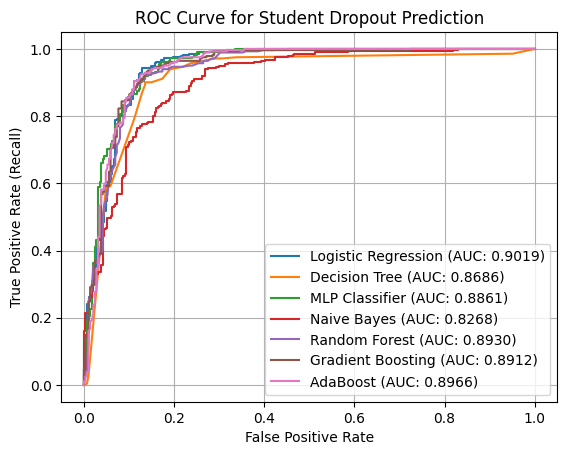

In [61]:
X1 = scaled_x[['Admissiongrade', 'Ageatenrollment', 'Overall_Enrolled',
       'Overall_Approved', 'Overall_Grade', 'Applicationmode_1',
       'Applicationmode_39', 'Course_9119', 'Course_9500', 'Debtor_0',
       'Debtor_1', 'TuitionFeesStatus_0', 'TuitionFeesStatus_1', 'Gender_0',
       'Gender_1', 'Scholarshipholder_0', 'Scholarshipholder_1']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y_encoded, test_size = 0.2, random_state = 42)

models = {
    'Logistic Regression': LogisticRegression(), 
    'Decision Tree': DecisionTreeClassifier(max_depth=5), 
    'MLP Classifier': MLPClassifier(), 
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(), 
    'Gradient Boosting': GradientBoostingClassifier(), 
    'AdaBoost': AdaBoostClassifier()
}

model_name = []
ac = []
f = []
pre = []
re = [] 
roc = []

for name, model in models.items(): 
    model.fit(X1_train, y1_train)
    y1_pred = model.predict(X1_test)
    y1_pred_prob = model.predict_proba(X1_test)[:, 1]
    
    accuracy = accuracy_score(y1_test, y1_pred)
    f1 = f1_score(y1_test, y1_pred)
    precision = precision_score(y1_test, y1_pred)
    recall = recall_score(y1_test, y1_pred)
    roc_score = roc_auc_score(y1_test, y1_pred)

    model_name.append(name)
    ac.append(accuracy)
    f.append(f1)
    pre.append(precision)
    re.append(recall)
    roc.append(roc_score) 

    fpr, tpr, _ = roc_curve(y1_test, y1_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_score:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve for Student Dropout Prediction')
    plt.legend()
    plt.grid(True)

    
Model_evaluation_kbest = pd.DataFrame({"Model Name": model_name, "Accuracy": ac, "F1 Score": f, "Precision": pre, "Recall": re, "ROC Score": roc})
Model_evaluation_kbest

## Lasso (L1 Regularization) <a class = 'anchor' id = '12.2'></a>

In [62]:
Lasso_model = Lasso(alpha = 0.01)
selector_l1 = SelectFromModel(Lasso_model, max_features = 17)  
x_lasso = selector_l1.fit_transform(x_train, y_train)

select_indices_lasso = selector_l1.get_support(indices = True)
select_features_lasso = x_train.columns[select_indices_lasso]
select_features_lasso


Index(['Overall_Enrolled', 'Overall_Evaluations', 'Overall_Approved',
       'Overall_Grade', 'Applicationmode_1', 'Applicationmode_26',
       'Applicationmode_27', 'Applicationmode_42', 'Course_9119',
       'Course_9238', 'Course_9500', 'Course_9853', 'Course_9991', 'Debtor_0',
       'TuitionFeesStatus_0', 'Gender_0', 'Scholarshipholder_0'],
      dtype='object')

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC Score
0,Logistic Regression,0.878735,0.884808,0.835962,0.939716,0.879266
1,Decision Tree,0.884007,0.888514,0.848387,0.932624,0.884431
2,MLP Classifier,0.885764,0.890017,0.851133,0.932624,0.886173
3,Naive Bayes,0.850615,0.866142,0.779037,0.975177,0.851700
4,Random Forest,0.880492,0.884746,0.847403,0.925532,0.880884
5,Gradient Boosting,0.882250,0.885860,0.852459,0.921986,0.882596
6,AdaBoost,0.885764,0.889643,0.853420,0.929078,0.886142


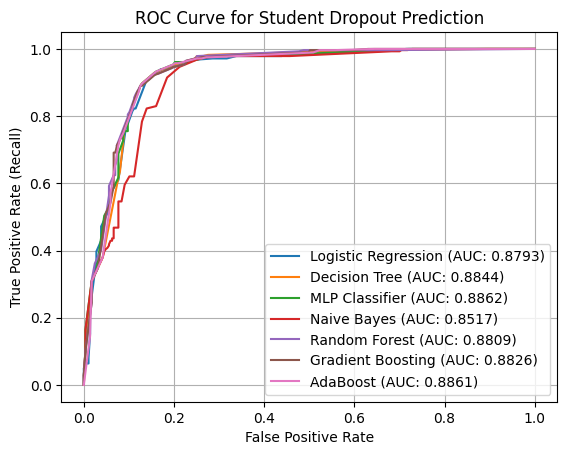

In [63]:
X2 = scaled_x[['Overall_Approved', 'TuitionFeesStatus_0', 'Scholarshipholder_0']]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y_encoded, test_size = 0.2, random_state = 42)

models = {
    'Logistic Regression': LogisticRegression(), 
    'Decision Tree': DecisionTreeClassifier(max_depth=5), 
    'MLP Classifier': MLPClassifier(), 
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(), 
    'Gradient Boosting': GradientBoostingClassifier(), 
    'AdaBoost': AdaBoostClassifier()
}

model_name = []
ac = []
f = []
pre = []
re = [] 
roc = []

for name, model in models.items(): 
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    y2_pred_prob = model.predict_proba(X2_test)[:, 1]
    
    accuracy = accuracy_score(y2_test, y2_pred)
    f1 = f1_score(y2_test, y2_pred)
    precision = precision_score(y2_test, y2_pred)
    recall = recall_score(y2_test, y2_pred)
    roc_score = roc_auc_score(y2_test, y2_pred)

    model_name.append(name)
    ac.append(accuracy)
    f.append(f1)
    pre.append(precision)
    re.append(recall)
    roc.append(roc_score) 

    fpr, tpr, _ = roc_curve(y2_test, y2_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_score:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve for Student Dropout Prediction')
    plt.legend()
    plt.grid(True)

    
Model_evaluation_lasso = pd.DataFrame({"Model Name": model_name, "Accuracy": ac, "F1 Score": f, "Precision": pre, "Recall": re, "ROC Score": roc})
Model_evaluation_lasso

## Recursive Feature Elimination (RFE) <a class = 'anchor' id = '12.3'></a>

In [64]:
CLF = RandomForestClassifier()
selector_rfe = RFE(CLF, n_features_to_select = 17)  
x_lasso = selector_rfe.fit_transform(x_train, y_train)

select_indices_rfe = selector_rfe.get_support(indices = True)
select_features_rfe = x_train.columns[select_indices_rfe]
select_features_rfe


Index(['PQGrade', 'Admissiongrade', 'Ageatenrollment', 'Unemploymentrate',
       'Inflationrate', 'GDP', 'Overall_Enrolled', 'Overall_Evaluations',
       'Overall_Approved', 'Overall_Grade', 'Applicationmode_1',
       'TuitionFeesStatus_0', 'TuitionFeesStatus_1', 'Gender_0', 'Gender_1',
       'Scholarshipholder_0', 'Scholarshipholder_1'],
      dtype='object')

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC Score
0,Logistic Regression,0.891037,0.894198,0.861842,0.929078,0.891368
1,Decision Tree,0.859402,0.862543,0.836667,0.890071,0.859670
2,MLP Classifier,0.892794,0.895009,0.869565,0.921986,0.893049
3,Naive Bayes,0.829525,0.846761,0.763533,0.950355,0.830578
4,Random Forest,0.884007,0.885813,0.864865,0.907801,0.884214
5,Gradient Boosting,0.892794,0.894281,0.874576,0.914894,0.892987
6,AdaBoost,0.875220,0.876950,0.857627,0.897163,0.875411


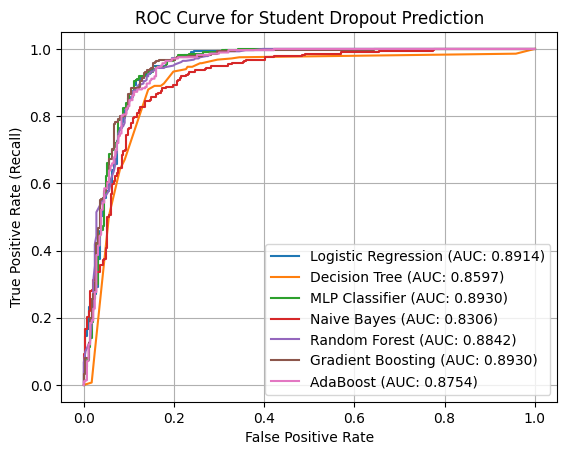

In [65]:
X3 = scaled_x[['PQGrade', 'Admissiongrade', 'Ageatenrollment', 'Unemploymentrate',
       'Inflationrate', 'GDP', 'Overall_Enrolled', 'Overall_Evaluations',
       'Overall_Approved', 'Overall_Grade', 'Applicationmode_1', 'Debtor_0',
       'TuitionFeesStatus_0', 'TuitionFeesStatus_1', 'Gender_0',
       'Scholarshipholder_0', 'Scholarshipholder_1']]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y_encoded, test_size = 0.2, random_state = 42)

models = {
    'Logistic Regression': LogisticRegression(), 
    'Decision Tree': DecisionTreeClassifier(max_depth=5), 
    'MLP Classifier': MLPClassifier(), 
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(), 
    'Gradient Boosting': GradientBoostingClassifier(), 
    'AdaBoost': AdaBoostClassifier()
}

model_name = []
ac = []
f = []
pre = []
re = [] 
roc = []

for name, model in models.items(): 
    model.fit(X3_train, y3_train)
    y3_pred = model.predict(X3_test)
    y3_pred_prob = model.predict_proba(X3_test)[:, 1]
    
    accuracy = accuracy_score(y3_test, y3_pred)
    f1 = f1_score(y3_test, y3_pred)
    precision = precision_score(y3_test, y3_pred)
    recall = recall_score(y3_test, y3_pred)
    roc_score = roc_auc_score(y3_test, y3_pred)

    model_name.append(name)
    ac.append(accuracy)
    f.append(f1)
    pre.append(precision)
    re.append(recall)
    roc.append(roc_score) 

    fpr, tpr, _ = roc_curve(y3_test, y3_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC: {roc_score:.4f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve for Student Dropout Prediction')
    plt.legend()
    plt.grid(True)

    
Model_evaluation_lasso = pd.DataFrame({"Model Name": model_name, "Accuracy": ac, "F1 Score": f, "Precision": pre, "Recall": re, "ROC Score": roc})
Model_evaluation_lasso

Here we can conclude that SelectKBest is the most accurate (high accuracy, precision, etc.) method.

# Hyperparameter Tuning <a class = 'anchor' id = '13'></a>

In [66]:
from sklearn.model_selection import GridSearchCV 

# Define hyperparameter grids for each model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_dt = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
param_grid_mlp = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)], 'alpha': [0.0001, 0.001, 0.01, 0.1], 'max_iter': [1000]}
param_grid_gbm = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}

models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Decision Tree': (DecisionTreeClassifier(), param_grid_dt),
    'MLP Classifier': (MLPClassifier(), param_grid_mlp),
    'Gradient Boosting Machines': (GradientBoostingClassifier(), param_grid_gbm),
    'Naive Bayes': (GaussianNB(), {'var_smoothing': np.logspace(0, -9, num=100) })
}

# Perform hyperparameter tuning for each model
best_models = {}
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5, scoring='accuracy')
    grid_search.fit(X1, y_encoded)
    best_models[name] = grid_search.best_estimator_


# Print best hyperparameters for each model
for name, model in best_models.items():
    print(f"Best hyperparameters for {name}: {model}")


# Evaluate best models on test set
results = {}
for name, model in best_models.items():
    results[name] = model.score(X1, y_encoded)


# Print test accuracy for each model
for name, accuracy in results.items():
    print(f"Test accuracy for {name}: {accuracy}")


Best hyperparameters for Logistic Regression: LogisticRegression(C=10)
Best hyperparameters for Random Forest: RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)
Best hyperparameters for Decision Tree: DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Best hyperparameters for MLP Classifier: MLPClassifier(alpha=0.1, max_iter=1000)
Best hyperparameters for Gradient Boosting Machines: GradientBoostingClassifier()
Best hyperparameters for Naive Bayes: GaussianNB(var_smoothing=0.04328761281083057)
Test accuracy for Logistic Regression: 0.8972554539057002
Test accuracy for Random Forest: 0.9377199155524278
Test accuracy for Decision Tree: 0.9261083743842364
Test accuracy for MLP Classifier: 0.9159042927515834
Test accuracy for Gradient Boosting Machines: 0.9215341308937368
Test accuracy for Naive Bayes: 0.817030260380014


# Result <a class = 'anchor' id = '14'></a>

In [67]:
best_model = best_models['Random Forest'] 
best_model

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

From these best models, the Random Forest Classifier shows high accuracy. 

# Model Deployment <a class = 'anchor' id = '15'></a>

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
import pickle

def log_transform(x):
  # Assuming x contains the feature you want to transform (e.g., x = df["Ageatenrollment"])
  return np.log(x)  # Handle zeros or negative values appropriately

def sqrt_transform(x):
  # Assuming x contains a list of column names to transform
  return np.sqrt(x)  # Apply sqrt to each column and handle negative values

# Import your DataFrame or data source (replace with your actual import)
import pandas as pd
df = pd.read_csv("data.csv", sep = ";")

# Define preprocessing and model steps
log_transformer = FunctionTransformer(log_transform, validate=False)
sqrt_transformer = FunctionTransformer(sqrt_transform, validate=False)  # Pass list of columns
preprocessor = StandardScaler()
best_model = best_models['Random Forest']

# Create a pipeline with corrected order (scaling after transformations)
pipeline = Pipeline(steps=[
  ('scaler', preprocessor),
  ('log_transform', log_transformer),
  ('sqrt_transform', sqrt_transformer),
  ('model', best_model)
])

# Train the pipeline on your data (X, y)
pipeline.fit(x, y)

with open("pipeline.pkl", "wb") as f:
  pickle.dump(pipeline, f)

# Limitations <a class = 'anchor' id = '16'></a>

**Data Representation:**

1. **Limited Scope**: *The dataset only captures information for the first two semesters. Long-term success or later dropout might not be reflected.*
2. **Standardization**: *Data from different programs (e.g., grading scales) might not be standardized, making comparisons difficult.*
3. **Missing Information**: *Important factors influencing student success, such as learning style, study habits, or mental health, may not be captured.*

**Modelling Challenges:**

1. **Imbalanced Classes**: *The predicted class distribution (more students in the "Other" category) can lead to biased models that prioritize the majority class.*
2. **Limited Causality**: *The dataset provides a snapshot of student information but doesn't necessarily prove causal relationships. For example, low first-semester performance doesn't guarantee a student will drop out.*

**External Factors:**

1. **External Events**: *The dataset doesn't capture external events (e.g., pandemics, economic crises) that might influence student success.*
2. **Institutional Specificity**: *The dataset is specific to one institution. Results may not generalize to other institutions with different demographics or programs.*

# Conclusion <a class = 'anchor' id = '17'></a>

*This study investigated the feasibility of predicting student dropout using data collected at the time of enrollment. We constructed a dataset encompassing demographics, socio-economic background, chosen academic path, and academic performance during the first two semesters. This data was then used to develop classification models that categorized students into three groups: dropouts, academically successful students, and those with "other" outcomes.*

**Key Findings:**

*The dataset offers valuable insights into potential predictors of student dropout, allowing institutions to identify at-risk students early.
However, the imbalanced nature of the data, with a significant majority likely falling under the "other" category, necessitates addressing class imbalance during model building.*

**Final Thoughts:**

*While dropout prediction models hold promise, their limitations must be considered. Data quality, external factors, and the model's inability to establish true causality demand a cautious approach when interpreting results.*

*The true value lies in utilizing dropout prediction as a starting point. By integrating it with a comprehensive understanding of student needs and challenges, institutions can establish robust support systems. These systems can encompass academic support, financial aid resources, mental health services, and fostering a strong sense of community.*

*Ultimately, a data-driven approach coupled with a commitment to student well-being presents a powerful strategy for improving retention rates, enhancing academic achievement, and cultivating a thriving learning environment*

# Future Work <a class = 'anchor' id = '18'></a>

**Data Enhancement:**

- **Incorporate Additional Data Sources:** *Include data on learning styles, study habits, extracurricular involvement, and mental health resources accessed to gain a more holistic picture of student lives.*
- **External Event Data:** *Explore integrating data on external events like economic downturns or pandemics to understand their impact on dropout rates.*
- **Longitudinal Studies:** *Extend the data collection period beyond the second semester to capture long-term dropout patterns and success trajectories.*

**Model Development:**

- **Advanced Techniques:** *Investigate the use of more sophisticated machine learning algorithms, such as deep learning architectures, to capture complex relationships within the data.*
- **Multi-class Classification:** *Explore the possibility of refining the classification task beyond three categories. This could involve predicting different dropout timings or degrees of academic success.*

**Intervention Strategies:**

- **Targeted Support:** *Develop personalized intervention strategies based on the model's predictions and student needs. This could include targeted tutoring, financial aid allocation, or mental health counseling.*
- **Early Outreach:** *Implement proactive outreach programs to connect with at-risk students early in their academic journey, fostering a sense of belonging and support.*
- **Impact Evaluation:** *Continuously evaluate the effectiveness of implemented intervention strategies to refine them and maximize their positive impact on student outcomes.*

**Generalizability:**

- **Multi-institutional Studies:** *Conduct similar studies across various institutions with diverse student populations to assess the generalizability of the findings and model performance.*
- **Context-aware Models:** *Develop models that can be adapted to the specific context and needs of different institutions, accounting for unique demographics, program offerings, and resources.*